## Lending club Case study

## Business Understanding

Working for Consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a  financial loss for the compan

## Objective

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default

In [1431]:
## Load the Libraries required for EDA
import pandas as pd ## used for data manipulation
import numpy as np  ## numerical python for mathematical calculation
import matplotlib.pyplot as plt   ## Data Visualization
import seaborn as sns   ## built on matplotlib to make plots interactive
import warnings 
warnings.filterwarnings('ignore') ## to ignore the warnings of version mismatch

In [1432]:
## Supress the scienticfic notation of values
pd.options.display.float_format = '{:.2f}'.format

## increasing the maximum number of rows and columns
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',150)

### Data Sourcing

In [1433]:
## Reading and Loading the data csv file
loan = pd.read_csv('loan.csv')
loan.head()  ## to see first 5 rows of data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [1434]:
## check the datatype of columns of the loan dataframe
loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

#### as we see from data,issue_d and earliest_cr_line  are date columns need to convert to date datatype

In [1435]:
### check the number of rows and columns present in the data
loan.shape

(39717, 111)

In [1436]:
### check the column names
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [1437]:
### check the informatiom/structure of the data
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [1438]:
## to check last 5 rows of data
loan.tail(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.00,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.00,0.00,13,0,7274,13.10%,40,f,0.00,0.00,2822.97,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.00,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.00,0.00,6,0,8847,26.90%,9,f,0.00,0.00,9913.49,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.00,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.00,0.00,11,0,9698,19.40%,20,f,0.00,0.00,5272.16,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.00,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.00,0.00,17,0,85607,0.70%,26,f,0.00,0.00,5174.20,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN

## Data cleaning 
it involves Missing value treatment,outlier detection  and data redundanices

In [1439]:
## check the missing and null values in the columns of data
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [1440]:
## check whether there are duplicates in our data
loan.duplicated().sum()


0

In [1441]:
## check the percentage of NaN or NULL values in the columns of data
loan_null_perc = round((loan.isnull().sum()/len(loan.index)*100),2)
loan_null_perc

id                                 0.00
member_id                          0.00
loan_amnt                          0.00
funded_amnt                        0.00
funded_amnt_inv                    0.00
term                               0.00
int_rate                           0.00
installment                        0.00
grade                              0.00
sub_grade                          0.00
emp_title                          6.19
emp_length                         2.71
home_ownership                     0.00
annual_inc                         0.00
verification_status                0.00
issue_d                            0.00
loan_status                        0.00
pymnt_plan                         0.00
url                                0.00
desc                              32.58
purpose                            0.00
title                              0.03
zip_code                           0.00
addr_state                         0.00
dti                                0.00


#### Most of the cloumns has 100% null values which can be dropped. There are some columns which has null value rates like 2%,6%,97%and 93% can be dropped as well. Lets consider a threshold of 30% means that dropping those columns which has 30% or more than 30% of null values present in them.


In [1442]:
## dropping those columns which has eaual or greater than 30 percent of null values 
loan.drop(loan_null_perc[loan_null_perc > 30].index, axis = 1, inplace =True)

In [1443]:
## check the rows and columns after dropping the columns with null values present.
loan.shape

(39717, 53)

In [1444]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [1445]:
## checking NaN or NULL values present in the rows greather than 0%
null_rows_perc = round(loan.isnull().sum(axis=1)/len(loan),2)*100
null_rows_perc[null_rows_perc > 0]

Series([], dtype: float64)

In [1446]:
## check the shape of data after dropping the columns
loan.shape

(39717, 53)

##### From the above output, No rows need to be deleted as there are no rows with NULL or NaN has values greater than 0%.

### check the column names with single value and drop those column names

In [1447]:
## Find the number of unique values present in each column
unique_cols = loan.nunique()
unique_cols.sort_values().head(10)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
term                          2
dtype: int64

In [1448]:
## select single value columns
col_single_value = unique_cols[unique_cols.values == 1]
col_single_value.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [1449]:
## drop the single value columns
loan.drop(columns=list(col_single_value.index),inplace = True)

In [1450]:
## check the shape of the dataframe
loan.shape

(39717, 44)

In [1451]:
round(loan.isnull().sum()/len(loan),2)*100

id                        0.00
member_id                 0.00
loan_amnt                 0.00
funded_amnt               0.00
funded_amnt_inv           0.00
term                      0.00
int_rate                  0.00
installment               0.00
grade                     0.00
sub_grade                 0.00
emp_title                 6.00
emp_length                3.00
home_ownership            0.00
annual_inc                0.00
verification_status       0.00
issue_d                   0.00
loan_status               0.00
url                       0.00
purpose                   0.00
title                     0.00
zip_code                  0.00
addr_state                0.00
dti                       0.00
delinq_2yrs               0.00
earliest_cr_line          0.00
inq_last_6mths            0.00
open_acc                  0.00
pub_rec                   0.00
revol_bal                 0.00
revol_util                0.00
total_acc                 0.00
out_prncp                 0.00
out_prnc

Company wants to finding those application which are risky before lending the money,the fields that are created after a loan application is approved does not need for analysis towards the business objective.So,Lets drop those fields

In [1452]:
### drop the insignificant columns 
loan_list = ['member_id','url','emp_title','title',
             'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
             'collection_recovery_fee','last_pymnt_amnt','last_credit_pull_d','last_pymnt_d','out_prncp',
            'out_prncp_inv','zip_code']

loan.drop(columns=loan_list,axis=1,inplace = True)

In [1453]:
loan.shape

(39717, 29)

In [1454]:
loan.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'pub_rec_bankruptcies'],
      dtype='object')

### drop 'total_pymnt', 'total_pymnt_inv' columns which are created after the loan is approved whileprocessing loan amout by investor

In [1455]:
loan.drop(columns=['total_pymnt', 'total_pymnt_inv'],axis=1,inplace = True)

In [1456]:
## check the rows and columns of data
loan.shape

(39717, 27)


####  Remove the special character found in dataset 
here columns int_rate and revol_util has % symbol at the end of each value/text


In [1457]:
loan['int_rate'] = loan['int_rate'].str.strip('%').astype('float')
loan['revol_util'] = loan['revol_util'].str.strip('%').astype('float')

## datatype conversion 
As we see that 'issue_d' column belongs to Date but it is stored as object datatype.need to convert this column into date datatype

In [1458]:
### converting to date datatype
loan['issue_d'] = pd.to_datetime(loan.issue_d,format="%b-%y")
## if there are any data before unix timestamp they are converted into 21st century values
## so subtracting values more than 2020 with 100 will give actual time

loan['issue_d'] = loan.issue_d.apply(lambda x: x-pd.DateOffset(years=100) if x.year>2020 else x)
loan['earliest_cr_line'] = pd.to_datetime(loan.earliest_cr_line,format="%b-%y")
loan['earliest_cr_line'] = loan.earliest_cr_line.apply(lambda x: x-pd.DateOffset(years=100) if x.year>2020 else x)


    

In [1459]:
loan.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util                     float64
total_acc                

In [1460]:
loan.shape

(39717, 27)

### Data Preparation

Lets explore categorical variables present in data

In [1461]:
## find out numerical columns 
categorical = ['object']

categorical_loan = loan.select_dtypes(include = categorical)
categorical_loan.columns

# category_list = loan.apply([lambda x: x[col] for col in x.columns[x.dtypes == 'object']])

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'addr_state'],
      dtype='object')

 category columns are ['term','grade','sub_grade','emp_length','home_ownership','verification_status','loan_status','purpose','addr_state']
 
 Lets see one by one

In [1462]:
### check for 'term' categorical variable

## checking unique values for term column
loan.term.unique()
print("Before:" , loan.term.unique())
## remove the spaces
loan['term'] = loan.term.str.strip()
print("after:" , loan.term.unique())



Before: [' 36 months' ' 60 months']
after: ['36 months' '60 months']


In [1463]:
loan.term.value_counts()

36 months    29096
60 months    10621
Name: term, dtype: int64

### Lets explore the loan_status

As we are looking for only the candidates who had already received the bank loan and paid fully or not. we are not looking for the candidates who has taken the loan and currently paying the emi

loan_status has 3 categories like Fully Paid,charged off and Current.So, lets remove Current values from loan_status



In [1464]:
### check the values of loan-status
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [1465]:
### Removing the current loan_status rows

loan = loan[loan.loan_status != 'Current']

### Derived variables
Lets create derived columns for the date columns issue_d and earliest_cr_line

In [1466]:
### creating a new column for issue_d
loan['issue_d_year'] = loan.issue_d.dt.year
loan['issue_d_month'] = loan.issue_d.dt.strftime('%b')
loan['issue_d_day'] = loan.issue_d.dt.weekday

## convert the datatype from int to object 
loan['issue_d_year'] = loan.issue_d_year.astype(object)
loan['issue_d_day'] = loan.issue_d_day.astype(object)
loan['issue_d_month'] = loan.issue_d_month.astype(object)

### creating a new column for earliest_cr_line
loan['earliest_cr_line_year'] = loan.earliest_cr_line.dt.year
loan['earliest_cr_line_month'] = loan.earliest_cr_line.dt.strftime('%b')
loan['earliest_cr_line_day'] = loan.earliest_cr_line.dt.weekday

## convert the datatype from int to object 
loan['earliest_cr_line_year'] = loan.earliest_cr_line_year.astype(object)
loan['earliest_cr_line_day'] = loan.earliest_cr_line_day.astype(object)
loan['earliest_cr_line_month'] = loan.earliest_cr_line_month.astype(object)

In [1467]:
loan.dtypes

id                                 int64
loan_amnt                          int64
funded_amnt                        int64
funded_amnt_inv                  float64
term                              object
int_rate                         float64
installment                      float64
grade                             object
sub_grade                         object
emp_length                        object
home_ownership                    object
annual_inc                       float64
verification_status               object
issue_d                   datetime64[ns]
loan_status                       object
purpose                           object
addr_state                        object
dti                              float64
delinq_2yrs                        int64
earliest_cr_line          datetime64[ns]
inq_last_6mths                     int64
open_acc                           int64
pub_rec                            int64
revol_bal                          int64
revol_util      

In [1468]:
### check the sumary statistics of numerical and categorical variables
loan.describe(include = 'all')

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_d_year,issue_d_month,issue_d_day,earliest_cr_line_year,earliest_cr_line_month,earliest_cr_line_day
count,38577.00,38577.00,38577.00,38577.00,38577,38577.00,38577.00,38577,38577,37544,38577,38577.00,38577,38577,38577,38577,38577,38577.00,38577.00,38577,38577.00,38577.00,38577.00,38577.00,38527.00,38577.00,37880.00,38577.00,38577,38577.00,38577.00,38577,38577.00
unique,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,11,5,NaN,3,55,2,14,50,NaN,NaN,524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,12,7.00,53.00,12,7.00
top,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,A4,10+ years,RENT,NaN,Not Verified,2011-11-01 00:00:00,Fully Paid,debt_consolidation,CA,NaN,NaN,1999-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.00,Dec,1.00,2000.00,Oct,4.00
freq,NaN,NaN,NaN,NaN,29096,NaN,NaN,11675,2873,8488,18480,NaN,16694,2062,32950,18055,6949,NaN,NaN,360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20516.00,4215,7286.00,3160.00,3967,5789.00
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1946-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,2008-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,676378.71,11047.03,10784.06,10222.48,NaN,11.93,322.47,NaN,NaN,NaN,NaN,68777.97,NaN,NaN,NaN,NaN,NaN,13.27,0.15,NaN,0.87,9.28,0.06,13289.49,48.70,22.05,0.04,NaN,NaN,NaN,NaN,NaN,NaN
std,209263.90,7348.44,7090.31,7022.72,NaN,3.69,208.64,NaN,NaN,NaN,NaN,64218.68,NaN,NaN,NaN,NaN,NaN,6.67,0.49,NaN,1.07,4.40,0.24,15866.49,28.36,11.43,0.20,NaN,NaN,NaN,NaN,NaN,NaN
min,54734.00,500.00,500.00,0.00,NaN,5.42,15.69,NaN,NaN,NaN,NaN,4000.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,2.00,0.00,0.00,0.00,2.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
25%,512033.00,5300.00,5200.00,5000.00,NaN,8.94,165.74,NaN,NaN,NaN,NaN,40000.00,NaN,NaN,NaN,NaN,NaN,8.13,0.00,NaN,0.00,6.00,0.00,3650.00,25.20,13.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN


In [1469]:

loan.isnull().sum()

id                           0
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_length                1033
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                  50
total_acc                    0
pub_rec_bankruptcies       697
issue_d_year                 0
issue_d_month                0
issue_d_day                  0
earliest_cr_line_year        0
earliest_cr_line_month       0
earliest

After dropping the columns which has more than 30% of null values,we still have the null values in columns like *emp_length*,*revol_util* and *pub_rec_bankruptcies* which are need to be imputed 



### Outlier Treatment

In [1470]:
## find out numerical columns 
numerics = ['int64','float64']

numeric_loan = loan.select_dtypes(include = numerics)

In [1471]:
numeric_loan.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [1472]:
## find out categorical columns 
categorical = ['object']

categorical_loan = loan.select_dtypes(include = categorical)

In [1473]:
categorical_loan.columns

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'addr_state',
       'issue_d_year', 'issue_d_month', 'issue_d_day', 'earliest_cr_line_year',
       'earliest_cr_line_month', 'earliest_cr_line_day'],
      dtype='object')

## annual_inc

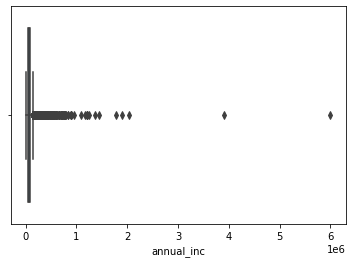

In [1474]:
## create a boxplot to see the outliers and spread of data 
sns.boxplot(loan['annual_inc'])
plt.show()

Outliers present for annual_inc column and Lets take quantile of 95% of data 

In [1475]:
annual_inc_percentile = loan['annual_inc'].quantile(0.95)
loan = loan[loan.annual_inc <= annual_inc_percentile]

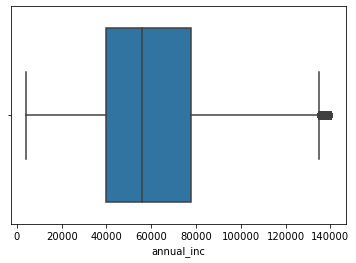

In [1476]:
sns.boxplot(loan.annual_inc)
plt.show()

**Observation:**
  - More outliers present at end of data greater than 95% of quantile.
  - there are still outliers present
  - data spreads from median(50%) to 75% higher than than 25% to median

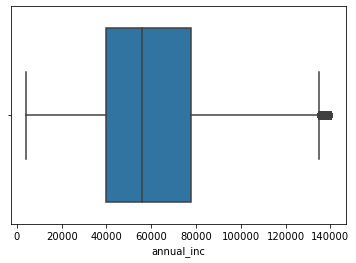

In [1477]:
sns.boxplot(loan.annual_inc)
plt.show()

### "annual_inc" data looks good Lets check  for other numeric variables

## debt to income

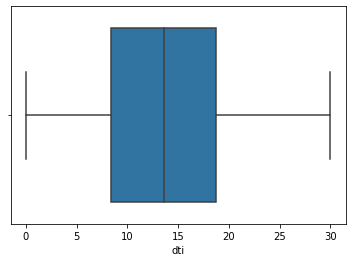

In [1478]:
## create a boxplot to see the outliers for debt to income field
sns.boxplot(loan.dti)
plt.show()

**observations:**
   - data spreads equally.
   - no outliers present
    

## loan_amnt

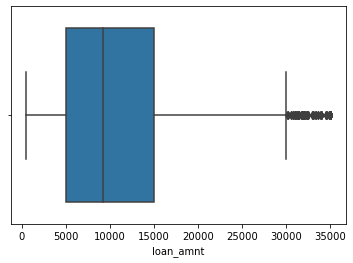

In [1479]:
sns.boxplot(loan.loan_amnt)
plt.show()

**observations:**
   - data spreads from 50% to 100% than 0% to 50% .
   - outliers exists
    

In [1480]:
loan.loan_amnt.quantile([0.5,0.25,0.75,0.90,0.95,0.97,0.975,0.98,0.99,1.00])

0.50    9250.00
0.25    5000.00
0.75   15000.00
0.90   20000.00
0.95   25000.00
0.97   25475.00
0.97   28000.00
0.98   30000.00
0.99   35000.00
1.00   35000.00
Name: loan_amnt, dtype: float64

## funded_amnt_inv

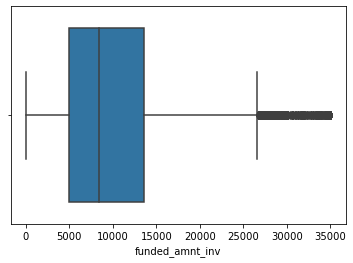

In [1481]:
sns.boxplot(loan.funded_amnt_inv)
plt.show()

In [1482]:
loan.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975,0.98,0.99,1.00])

0.50    8375.00
0.75   13623.73
0.90   19750.00
0.95   23941.88
0.97   24975.00
0.97   25350.00
0.98   27950.00
0.99   31954.03
1.00   35000.00
Name: funded_amnt_inv, dtype: float64

As we see from above ,  there are some values far from ditribution but they are contineous in data ,so lets not remove the outliers

**different ways to remove the outliers are:-**
   - z-score method
   - IQR method
   - Percentile(setting the threshold)
   
 ##### Lets remove the outliers by any one of the method



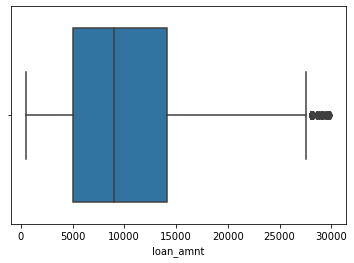

In [1483]:
## remove the outliers using IQR method for loan_amount column

outlier_loan = loan
percentile_25 = outlier_loan['loan_amnt'].quantile(0.25)
percentile_75 = outlier_loan['loan_amnt'].quantile(0.75)
IQR = percentile_75 - percentile_25

upper_limit = percentile_75 +1.5 * IQR
lower_limit = percentile_75 +1.5 * IQR
new_loan = outlier_loan[outlier_loan['loan_amnt'] < upper_limit]
outlier_loan[outlier_loan['loan_amnt'] > lower_limit]

sns.boxplot(new_loan['loan_amnt'])
plt.show()


**observations:**
   - only few outliers left after removing outliers using IQR method
   - outliers exist only at upper limit

## Univariate analysis

Analyzing the data with only one variable

In [1484]:
### Lets explore the numeric columns 
### Lets write a function for displaying the plots instead of writing the same code every time

def dist_and_box_plots(df,col):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.distplot(a=df[col],rug=True)
    plt.subplot(1,2,2)
    sns.boxplot(data=df[col])
    plt.suptitle('{} distribution'.format(col))
    plt.show()

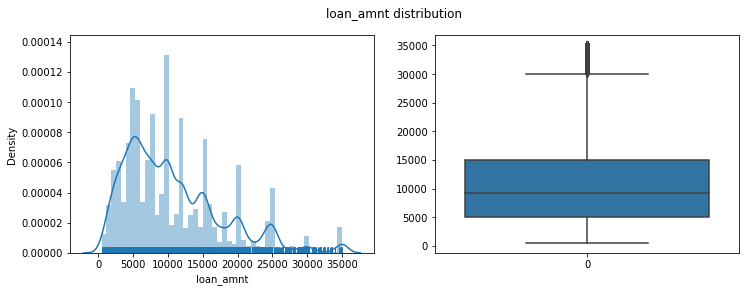

In [1485]:
dist_and_box_plots(loan,"loan_amnt")

In [1486]:
## check the distribution
loan.loan_amnt.describe()

count   36654.00
mean    10682.25
std      7048.41
min       500.00
25%      5000.00
50%      9250.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

**observations**:
  - More number of people took loan amount around 10000 and median value also around 10k and less number of people took a loan of 30k

### funded amnt
total loan approved at this point in time

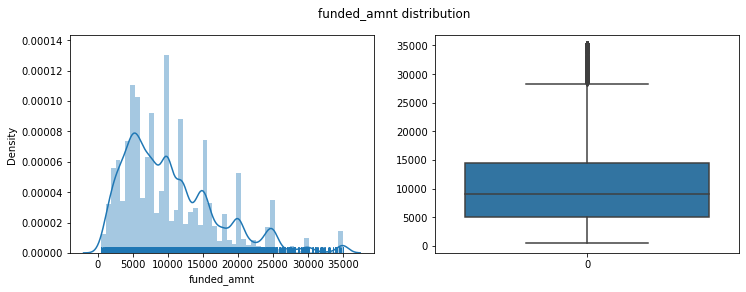

In [1487]:
dist_and_box_plots(loan,"funded_amnt")

In [1488]:
## check the distribution
numeric_loan.funded_amnt.describe()

count   38577.00
mean    10784.06
std      7090.31
min       500.00
25%      5200.00
50%      9550.00
75%     15000.00
max     35000.00
Name: funded_amnt, dtype: float64

**observations**:
  - lending club company most approved the loan of 10k more and less of 35k
  - similar to loan amount,which says lendling club approved almost of applied loan amount

### funded_amnt_inv
the amount funded by investors to borrowers

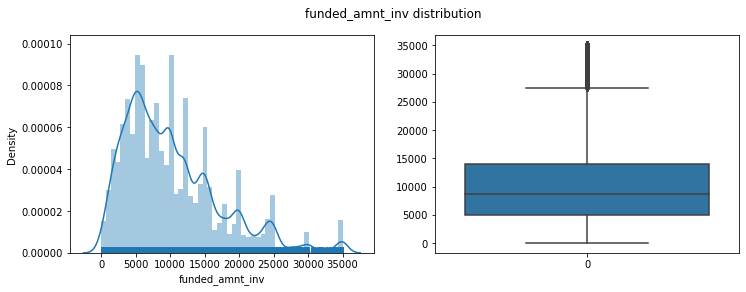

In [1489]:
dist_and_box_plots(numeric_loan,"funded_amnt_inv")

In [1491]:
## check the distribution
loan.funded_amnt_inv.describe()

count   36654.00
mean     9894.18
std      6730.76
min         0.00
25%      4975.00
50%      8375.00
75%     13623.73
max     35000.00
Name: funded_amnt_inv, dtype: float64

**observations**:
  - lending club company most funded the loan of 10k more and less of 35k
  - similar to loan amount,which says lendling club funded almost of applied loan amount

### int_rate
interest rate for the loan

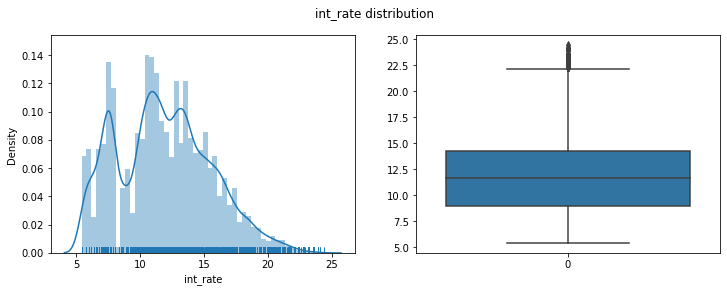

In [1492]:
dist_and_box_plots(loan,"int_rate")

In [1493]:
## check the distribution
loan.int_rate.describe()

count   36654.00
mean       11.89
std         3.67
min         5.42
25%         8.94
50%        11.71
75%        14.27
max        24.40
Name: int_rate, dtype: float64

**observation:**
   - interest rate lies between **9 to 14.5%**.
   - highest interest rate is 22.5% and lowest interest rate is 5.5%
   

### Installemnt
the monthly payment owned by the borrower if the loan originates

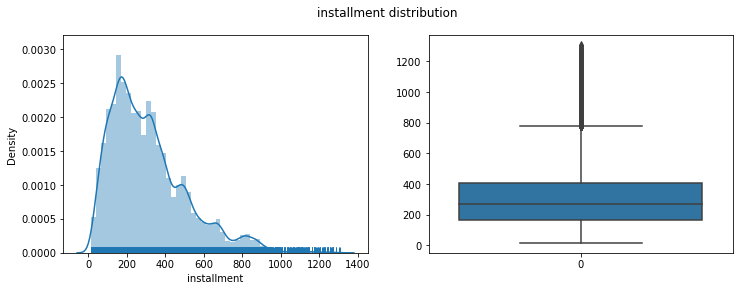

In [1494]:
dist_and_box_plots(loan,"installment")

In [1495]:
loan.installment.describe()

count   36654.00
mean      311.89
std       199.23
min        15.69
25%       163.08
50%       270.42
75%       408.48
max      1305.19
Name: installment, dtype: float64

**observations**:
    most of the installments lies between 200 to 400 and most representative installment is 270rs paid by investors

## Annual_income
the annual income provided by borrower while applying for a loan 

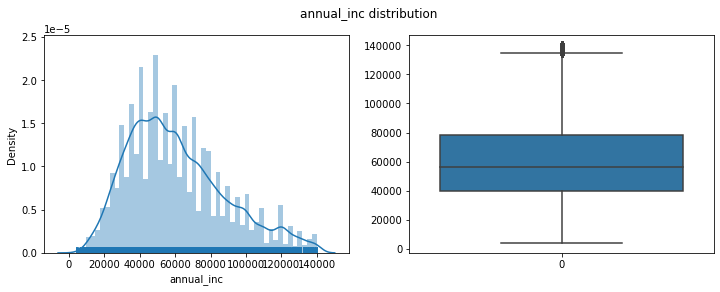

In [1496]:
### creating plots for annual_inc distribution
dist_and_box_plots(loan,"annual_inc")

In [1497]:
loan.annual_inc.describe(percentiles=[0.05,0.25,0.50,0.75,0.90,0.95,0.99,])

count    36654.00
mean     60855.75
std      27750.28
min       4000.00
5%       24000.00
25%      40000.00
50%      56000.00
75%      77970.50
90%     100000.00
95%     117000.00
99%     135000.00
max     140004.00
Name: annual_inc, dtype: float64

**observations:**

most of the people annual income ranges from >40000 and less than 80000 and 99% of people are having incomes less than 135000

## Debt to income

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


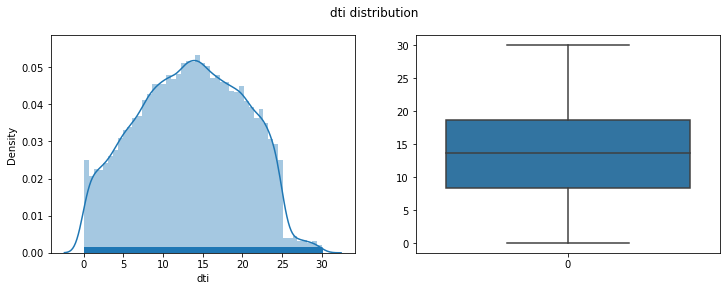

In [1498]:
### creating plots for dti distribution
dist_and_box_plots(loan,"dti")

In [1499]:
loan.dti.describe()

count   36654.00
mean       13.45
std         6.66
min         0.00
25%         8.35
50%        13.58
75%        18.71
max        29.99
Name: dti, dtype: float64

**observations**:
    there are no outliers in the data and the distribution is similar to normal distribution.This is good where all the loans are given to borrowers who have debt to income ratio less than 30

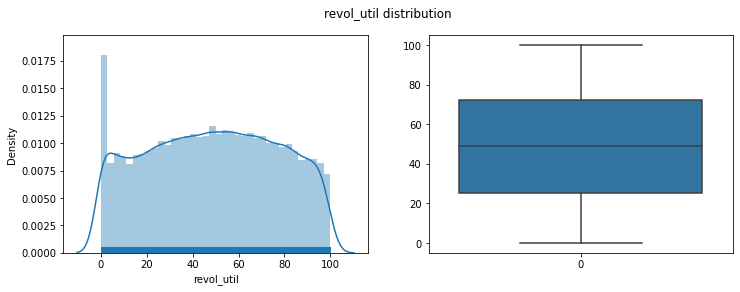

In [1500]:
dist_and_box_plots(loan,"revol_util")

In [1501]:
loan.revol_util.describe()

count   36606.00
mean       48.66
std        28.28
min         0.00
25%        25.30
50%        49.00
75%        72.10
max        99.90
Name: revol_util, dtype: float64

**observations**:
    - revol_util does not have outliers
    - data is not normally distributed

### Pub rec
Number of Public derogatory records

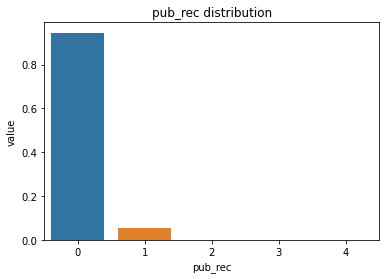

In [1502]:
### finding the percentage and creating bar plot for Public records
perc_Df = loan['pub_rec'].value_counts(normalize=True).reset_index()
sns.barplot(x='index',y='pub_rec',data=perc_Df)
plt.xlabel('pub_rec')
plt.ylabel('value')
plt.title('pub_rec distribution')
plt.show()



**observation**:
    - around 90% borrowers does not have public derogatory records

### pub_rec_bankruptcies
Number of public record bankruptcies

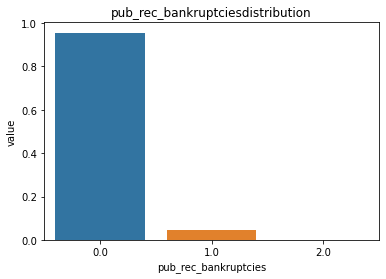

In [1503]:
col = "pub_rec_bankruptcies"

perc_Df = loan[col].value_counts(normalize=True).reset_index()
sns.barplot(x='index',y=col,data=perc_Df)
plt.xlabel(col)
plt.ylabel('value')
plt.title(col + 'distribution')
plt.show()

**observations**:
    99% people have not went bankrupt

## Analyis for date columns

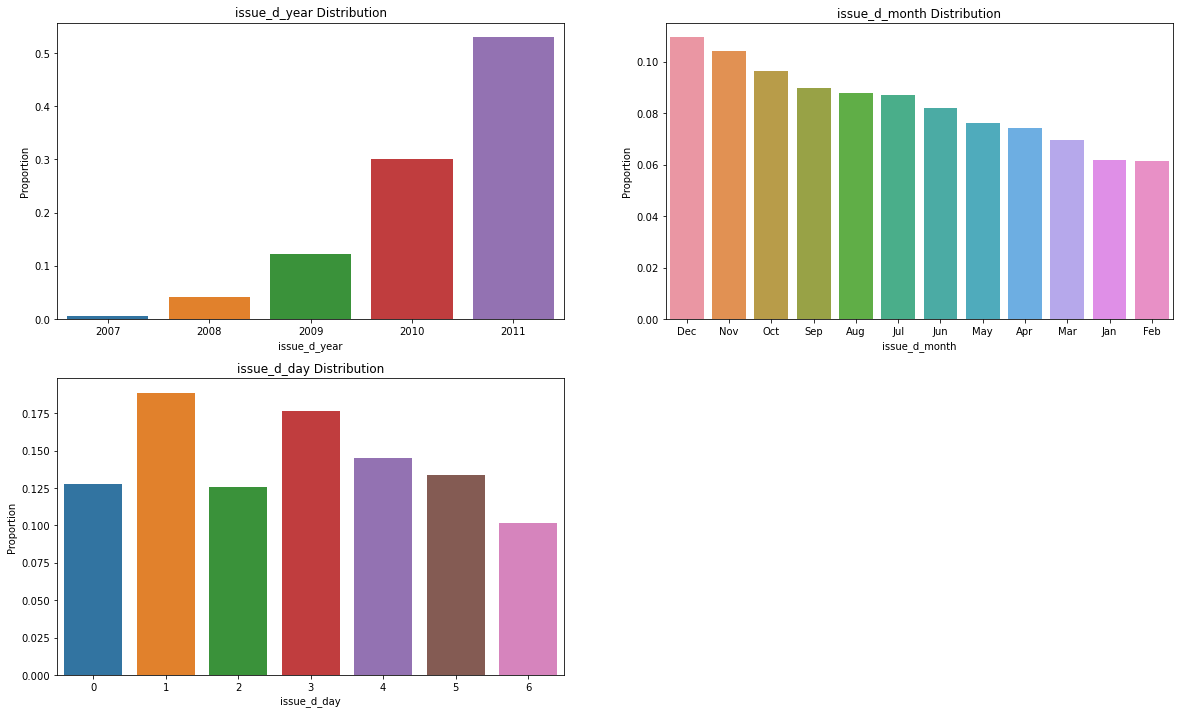

In [1504]:
var_1 = "issue_d_year"

## Percentage of each values
perc_var_df = loan[var_1].value_counts(normalize=True).reset_index()

plt.figure(figsize = (20,12))
plt.subplot(2,2,1)

sns.barplot(x='index',y=var_1,data=perc_var_df)
plt.xlabel(var_1)
plt.ylabel('Proportion')
plt.title(var_1 + ' Distribution')


var_2 = "issue_d_month"

## Percentage of each values
perc_var_df = loan[var_2].value_counts(normalize=True).reset_index()

plt.subplot(2,2,2)
sns.barplot(x='index',y=var_2,data=perc_var_df)
plt.xlabel(var_2)
plt.ylabel('Proportion')
plt.title(var_2 + ' Distribution')


var_3 = "issue_d_day"

## Percentage of each values
perc_var_df = loan[var_3].value_counts(normalize=True).reset_index()

plt.subplot(2,2,3)
sns.barplot(x='index',y=var_3,data=perc_var_df)
plt.xlabel(var_3)
plt.ylabel('Proportion')
plt.title(var_3 + ' Distribution')

plt.show()

 **observations**:
        - Loan has issued more on 2011 year
        - there are more issue of loan in 3 months of every year oct,nov and Dec
        -Lending Club has issued more loans on tuesday and thursday

### Earliest credit Line(earliest_cr_line)


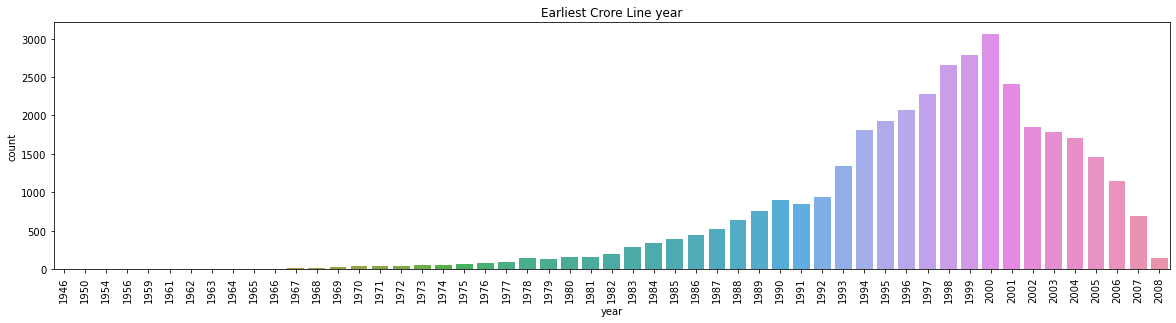

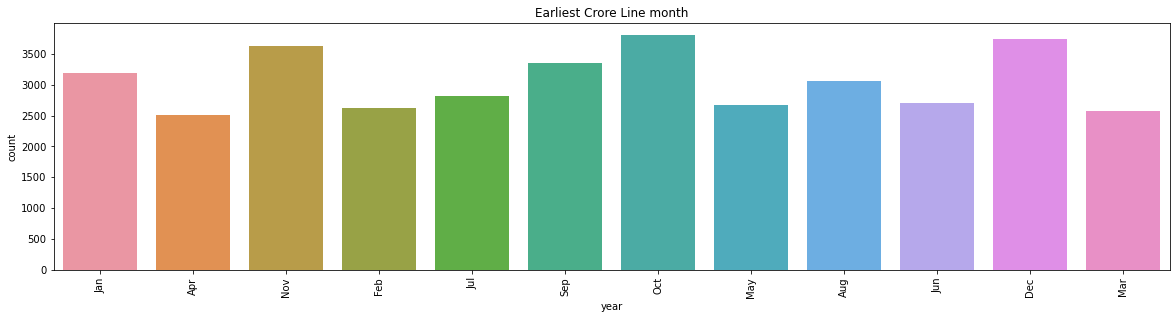

In [1505]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.countplot(loan.earliest_cr_line_year)
plt.title('Earliest Crore Line year')
plt.xticks(rotation=90)
plt.xlabel('year')
plt.ylabel('count')

plt.figure(figsize=(20,10))
plt.subplot(2,1,2)
sns.countplot(loan.earliest_cr_line_month)
plt.title('Earliest Crore Line month')
plt.xticks(rotation=90)
plt.xlabel('year')
plt.ylabel('count')

plt.show()


**observations**:
   - Loan borrowers have got highest earlier credit line in year 2000.
   - Loan borrowers have got almost earliest credit line in the end of year i.e.Oct,Nov,Dec
    

###  Analysis for Categorical Variables

Lets see distribution of categoricalvariables using barplot

In [711]:
categorical_loan.columns

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'issue_d_year', 'issue_d_month', 'issue_d_day',
       'earliest_cr_line_year', 'earliest_cr_line_month',
       'earliest_cr_line_day'],
      dtype='object')

## Term

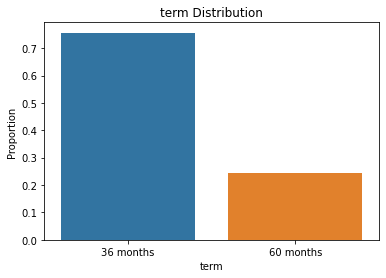

In [1506]:
### Lets create a function
def bar_plots(df,cat_var):
    ## Percentage of each values
    perc_var_df = loan[cat_var].value_counts(normalize=True).reset_index()
    
    if(cat_var == 'sub_grade') | (cat_var == 'addr_state'):
        plt.figure(figsize=(20,6))
        ## create a barplot
        sns.barplot(x='index',y=cat_var,data=perc_var_df)
        plt.xlabel(cat_var)
        plt.ylabel('Proportion')
        plt.title(cat_var + ' Distribution')
        plt.show()
    elif(cat_var == 'purpose') | (cat_var == 'emp_length'):
        plt.figure(figsize=(12,6))
        ## create a barplot
        sns.barplot(x='index',y=cat_var,data=perc_var_df)
        plt.xticks(rotation=90)
        plt.xlabel(cat_var)
        plt.ylabel('Proportion')
        plt.title(cat_var + ' Distribution')
        plt.show()
    else:
        ## create a barplot
        sns.barplot(x='index',y=cat_var,data=perc_var_df)           
        plt.xlabel(cat_var)
        plt.ylabel('Proportion')
        plt.title(cat_var + ' Distribution')
        plt.show()
        
  

bar_plots(loan,"term")

**observations**:
   - Borrowers have taken 36 months tenure more than 60 months

## Grade

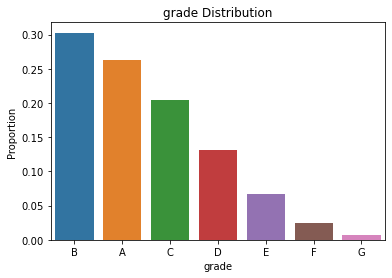

In [1507]:
bar_plots(loan,"grade")

**observations**:
- Most of the borrowers fall under B and A grades


### sub_grade

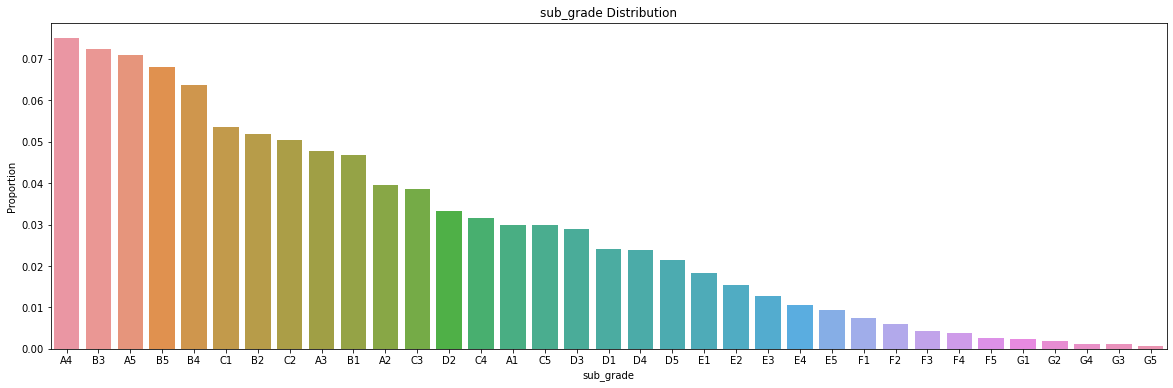

In [1508]:
bar_plots(loan,"sub_grade")

**observations**:
   - Most of the borrowers does fall under the grades of A and B but,does not fall on all the subgardes of A and B

### home_ownership

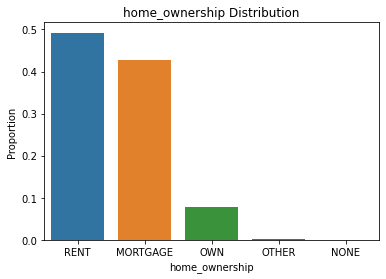

In [1509]:
bar_plots(loan,"home_ownership")

**observations**:
- loan borrowers are mostly having rented or mortarage houses

### verification_status

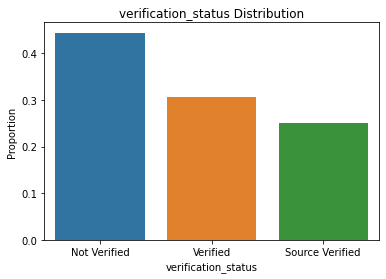

In [1510]:
bar_plots(loan,"verification_status")

**observations**:
   - Majority of loans given are not verified

### Loan Status

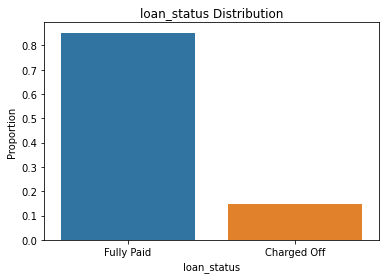

In [1511]:
bar_plots(loan,"loan_status")

**observations**:
- 85% of the borrowers are fully paid the loan and 14% are defaulted the loan

### Purpose

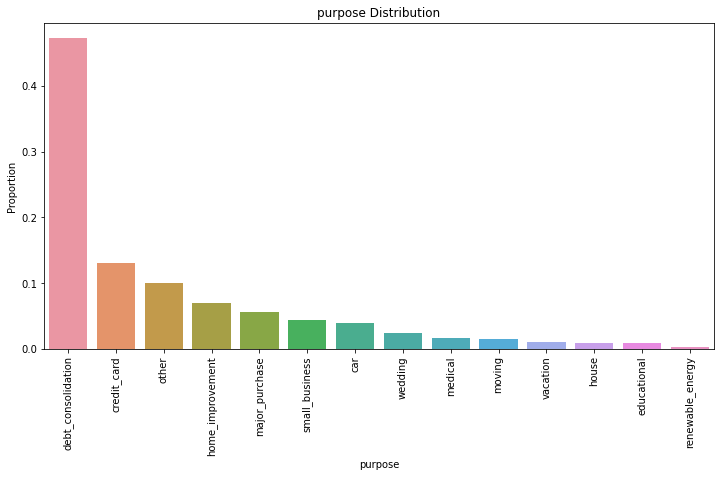

In [1512]:
## calling the function to create a  chart for purpose distribution
bar_plots(loan,"purpose")

**observations**:
- Borrowers morely took a loan for the purpose of debt_consolidation and less for renewable_energy purpose

### Address State

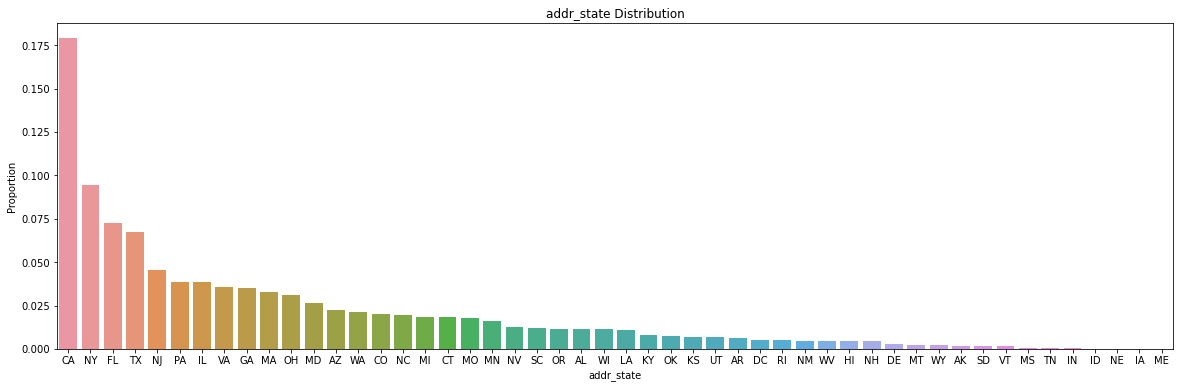

In [1513]:
bar_plots(loan,"addr_state")

**observations**:
   - Most of the Borrowers are from states CA,NY,FL,TX

## Segmented Univariate analysis

### Loan Amount


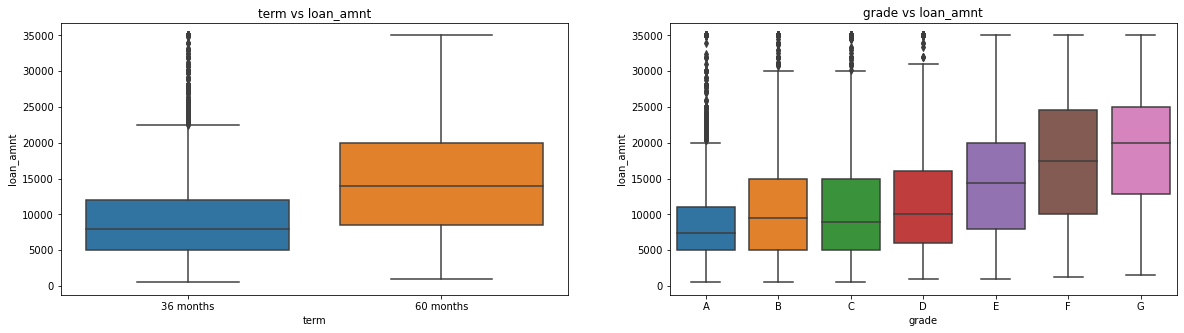

In [1514]:
### Creating a function for all segmented variables
def segment_plots(df,var1,var2,var3=None):
    if(var3 is None) & (var1 == "purpose") | (var1 == "emp_length"):
        plt.figure(figsize=(20,6))
        sns.boxplot(x=var1,y=df[var2],data = df)
        plt.title(var1 + ' vs ' + var2)
        plt.xticks(rotation=90)
        plt.show()
    elif(var3 is None):
        sns.boxplot(x=var1,y=df[var2],data = df)
        plt.title(var1 + ' vs ' + var2)
        plt.show()
    else:
        plt.figure(figsize=(20,5))
        plt.subplot(121)
        sns.boxplot(x=var1,y=df[var2],data = df)
        plt.title(var1 + ' vs ' + var2)
        plt.subplot(122)
        plt.title(var3 + ' vs ' + var2)
        if var3 == 'grade':
            order_var = loan[var3].unique()
            order_var.sort()
            sns.boxplot(x=var3,y=df[var2],data = df,order = order_var)
            plt.show()
        else:
            sns.boxplot(x=var3,y=df[var2],data = df)
            plt.show()
        
        
        
segment_plots(loan,"term","loan_amnt","grade")



**observations**:
  - Borrowers who take higher loan amount which is of 60 months tenure are likely to be default
  - Borrowers who take lesser loan amount which is of 30 months tenure are fully paid the loan
  - Borrowers fall under Grade A has took a small amount of loan than other grades
  - Borrowers fall under Grade F and G has took a higher amount of loan than other grades
    

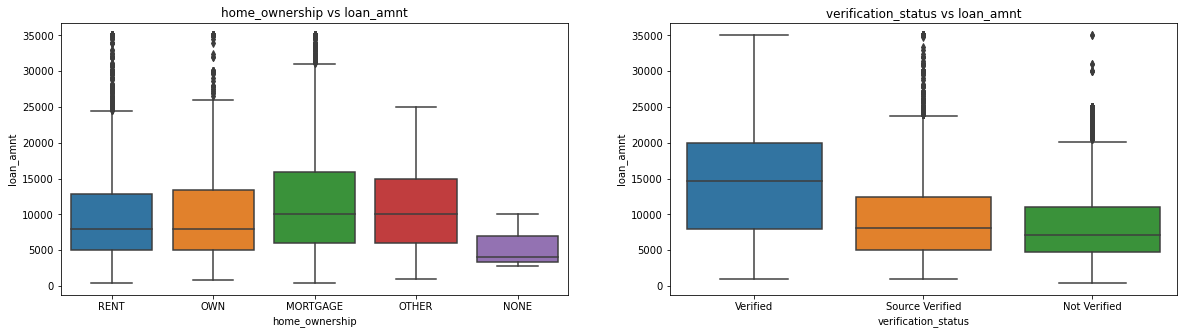

In [1515]:
segment_plots(loan,"home_ownership","loan_amnt","verification_status")

**observations**:
 - Borrowers who owned MORTAGE has took higher loan amount and less owned NONE
 - Borrowers are verified who are taking the loan greater 9k


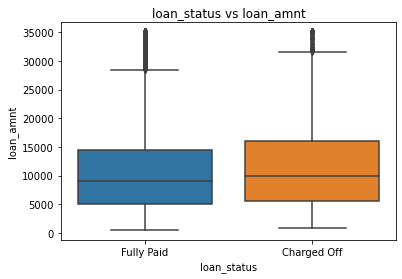

In [1516]:
segment_plots(loan,var1 = "loan_status",var2 = "loan_amnt",var3 = None)

**observations:**
   - Charged Off loans having higher amounts than Fully Paid

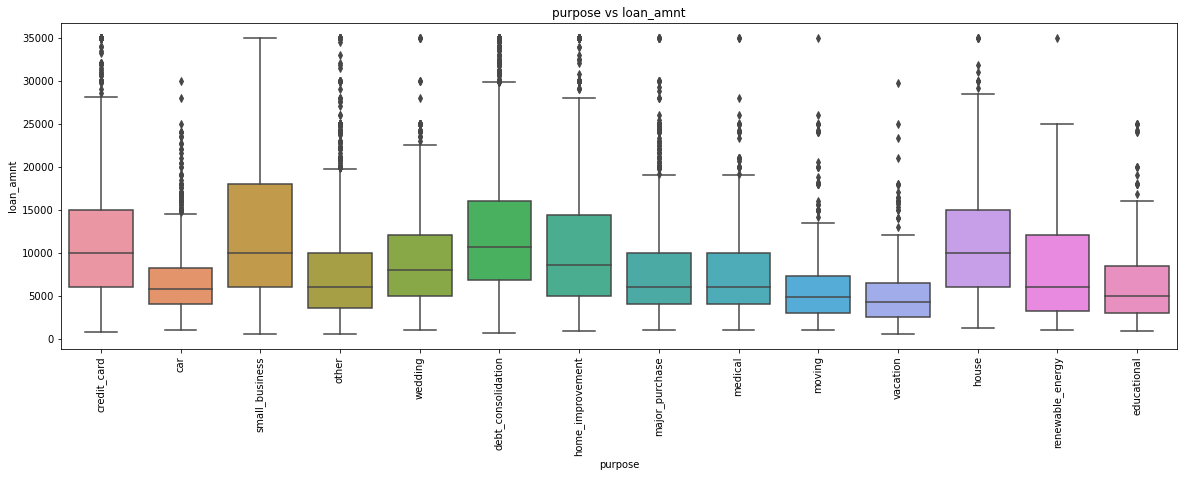

In [1517]:
segment_plots(loan,var1 = "purpose",var2 = "loan_amnt",var3 = None)

**observations:**
   - small_business,debt_consolidation and house took highest loan amount comparatively others
   

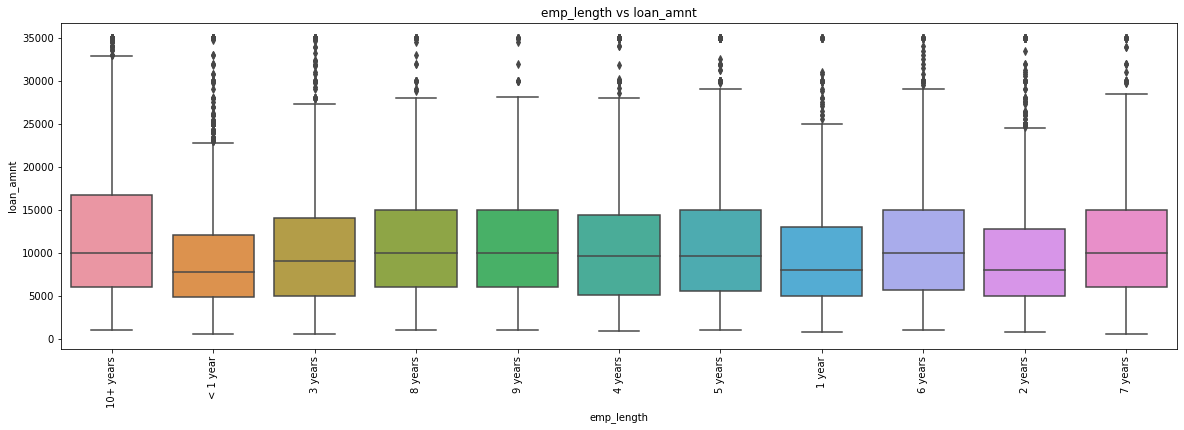

In [1518]:
segment_plots(loan,var1 = "emp_length",var2 = "loan_amnt",var3 = None)

**observations:**
   - Borrowers took high loan amount who has more than 10 years of experience
   - more borrowers from 10+ years and least for < 1year

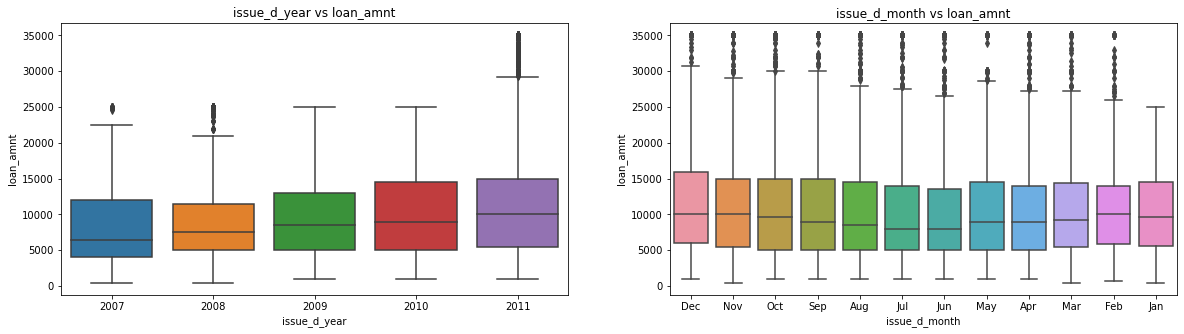

In [1519]:
segment_plots(loan,var1 = "issue_d_year",var2 = "loan_amnt",var3 = "issue_d_month")

**observations**:
  - few borrowers took higher loan amount in the year 2010 and 2011 
  - median of the distribution is more spreads as the years increases,which means people have taken different loan amounts in each year.
  - almost all the borrowers have taken similar loan amount which is less than 15k for all the months except december
    

### Funded Amount

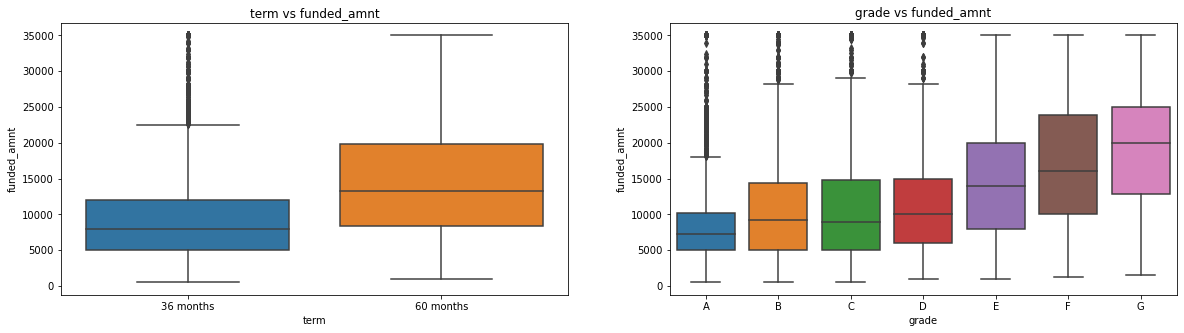

In [1520]:
segment_plots(loan,var1 = "term",var2 = "funded_amnt",var3 = "grade")

**observations**:
  - Majority of Borrowers are likely to be default who took a higher loan amount and 60 months tenure
  - least are fully Paid and took less amount than 60 months tenure
  - Borrowers fall into G Grade has less spread above median and for all others grades distribution spreads eaually
  - Borrowers who fall into A grade has took very high loan amount considering all other grades
  - Borrowers who fall into F and G Grade has took high loon amount than other grades

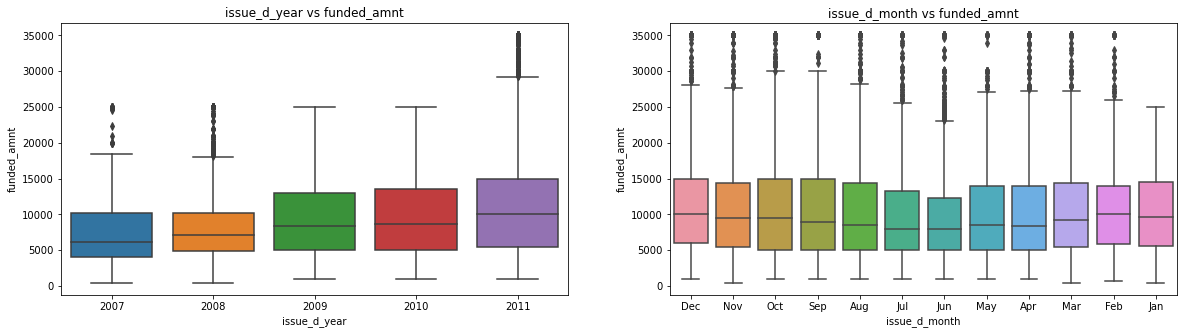

In [1521]:
segment_plots(loan,var1 = "issue_d_year",var2 = "funded_amnt",var3 = "issue_d_month")

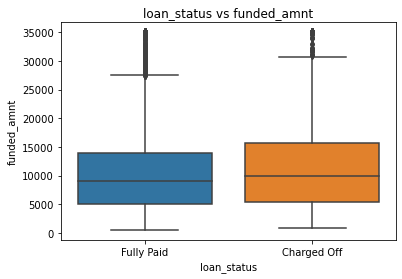

In [1522]:
segment_plots(loan,var1 = "loan_status",var2 = "funded_amnt",var3 = None)

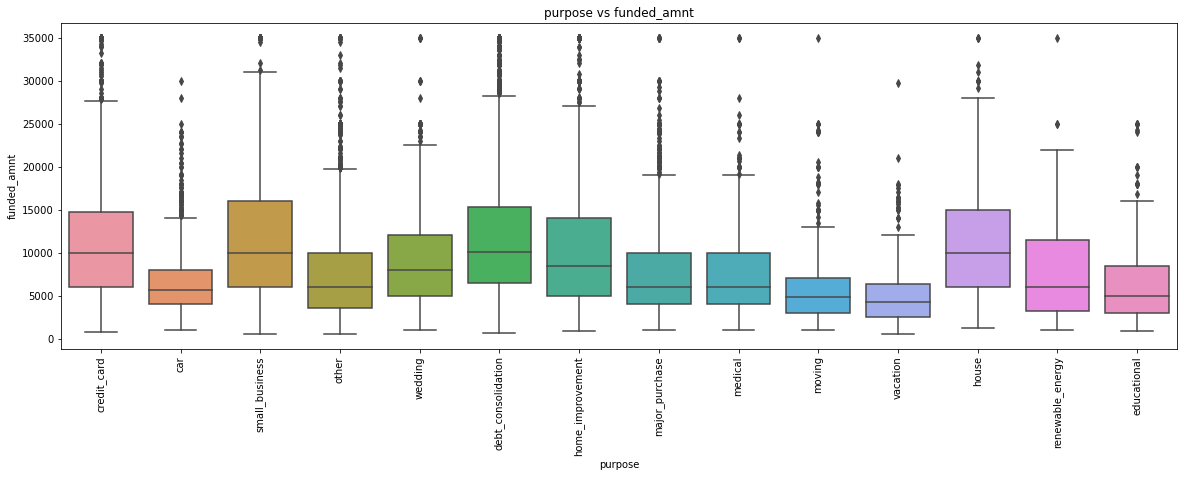

In [1523]:
segment_plots(loan,var1 = "purpose",var2 = "funded_amnt",var3 = None)

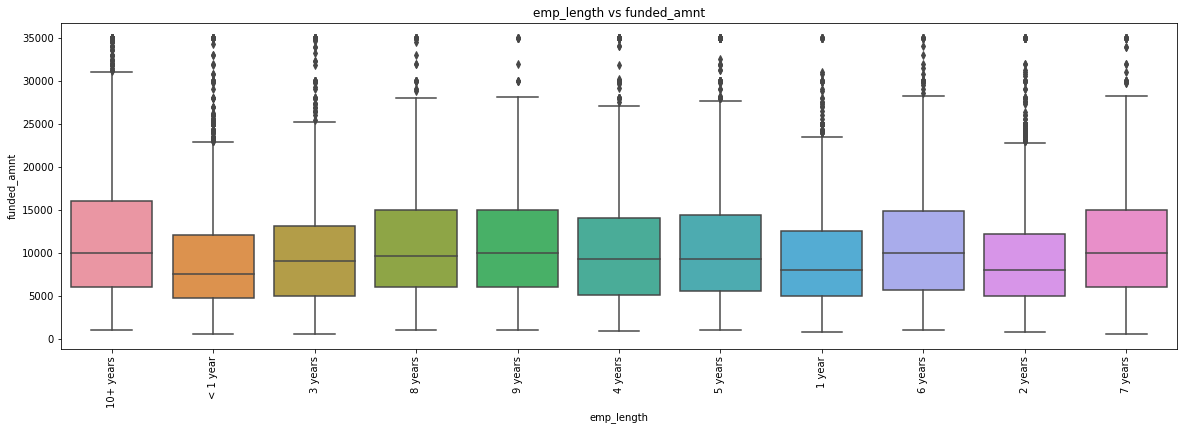

In [1524]:
segment_plots(loan,var1 = "emp_length",var2 = "funded_amnt",var3 = None)

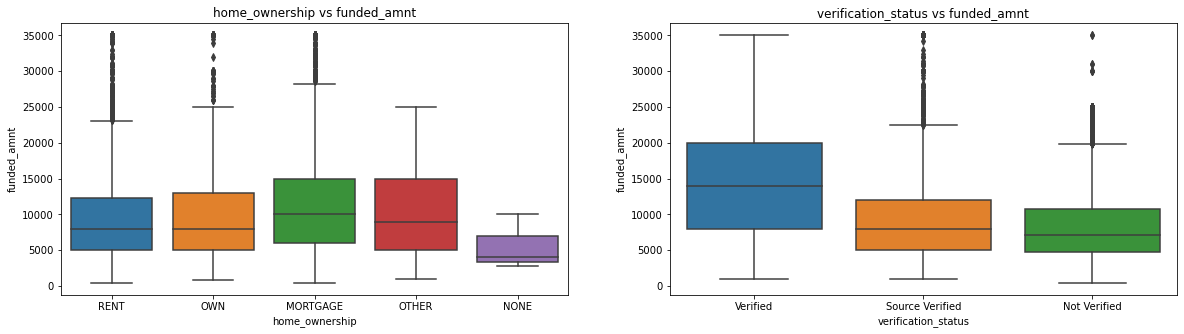

In [1525]:
segment_plots(loan,"home_ownership","funded_amnt","verification_status")

**observations**:
   - The Funded Amount has similar observations as Loan Amount

### interest Rate

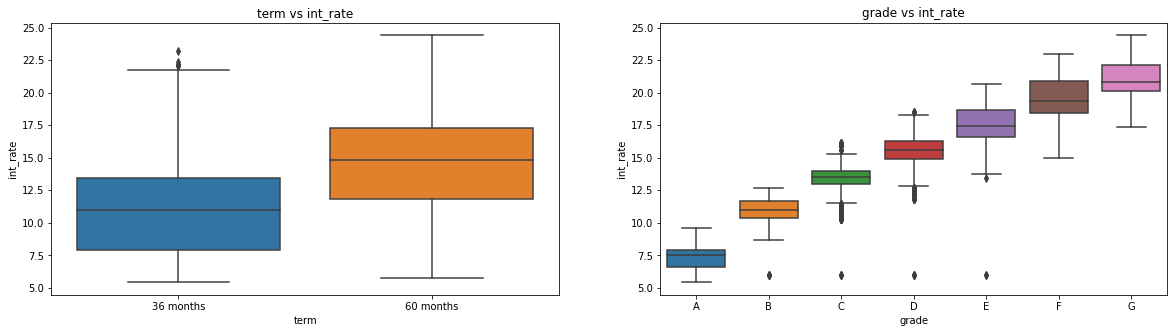

In [1526]:
segment_plots(loan,var1 = "term",var2 = "int_rate",var3 = "grade")

**observations**:
    - The interest Rates are higer for higher tenure loans
    - also the interest rates are increased as per as Grades from A to G

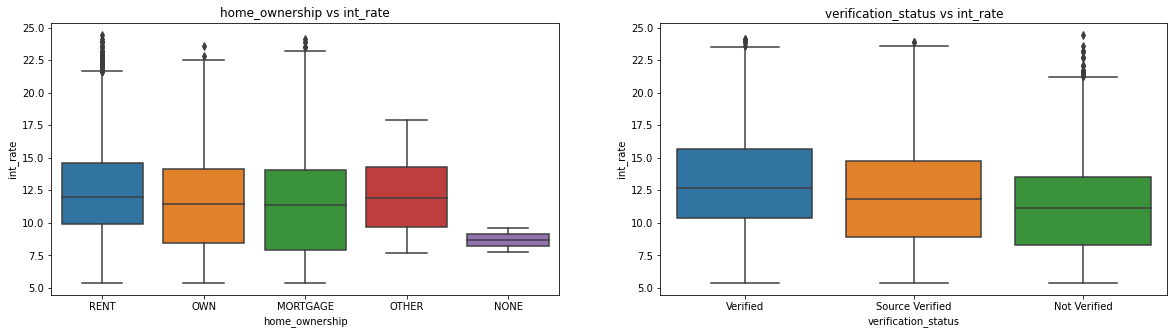

In [1527]:
segment_plots(loan,var1 = "home_ownership",var2 = "int_rate",var3 = "verification_status")

**observations**
  - Non verified borrowers got less interest than verified and source verified
  - as we see that NONE ownership has took low loan amount has less interest rates
  - But OWN and MORTARAGE ownership has took high loan amount with low interest rates








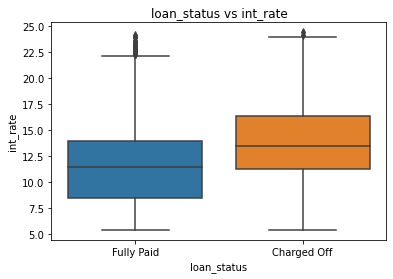

In [1528]:
segment_plots(loan,var1 = "loan_status",var2 = "int_rate",var3 = None)

**observations**
 - Borrowers who took higher loan amount has high interest rates and more likely to be a default
 - Borrowers who took less loan amount has low interest rates(compared to Charged Off) are fully faid 

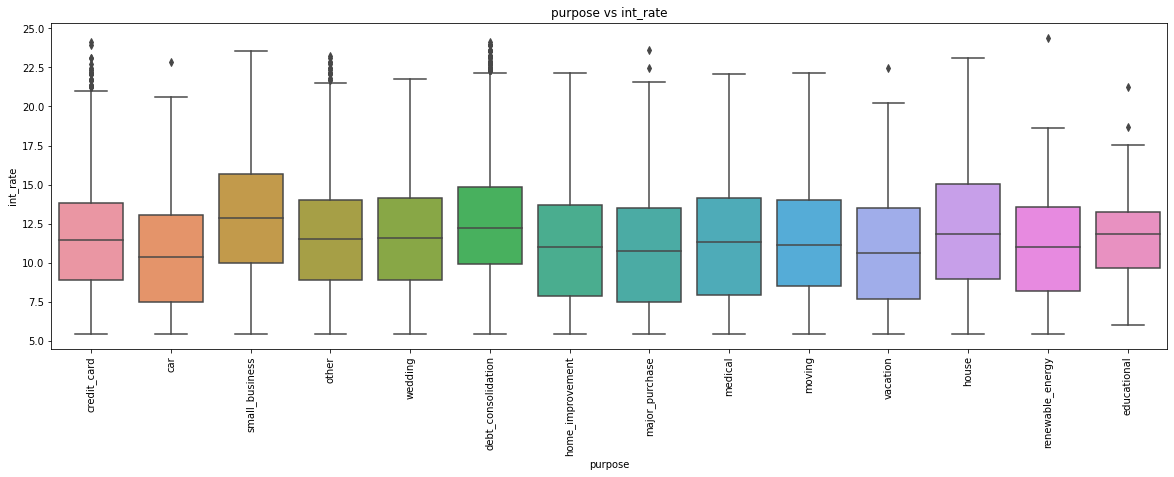

In [1529]:
segment_plots(loan,var1 = "purpose",var2 = "int_rate",var3 = None)

**observations**:
  - small business,debt_consolidations and House loans are given with more high interest rates comparatively others
  - small business,debt_consolidations and House loans has taken high loan amount has high interest than others
  

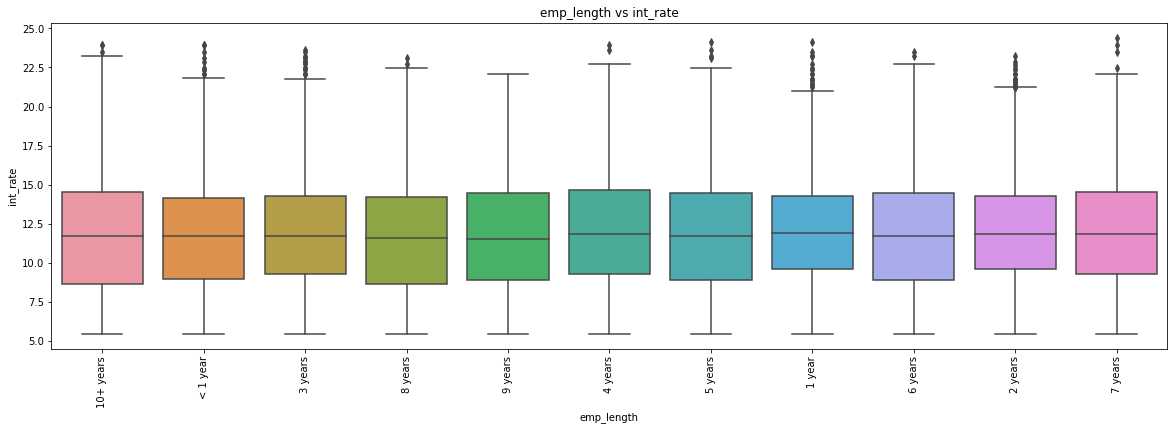

In [1530]:
segment_plots(loan,var1 = "emp_length",var2 = "int_rate",var3 = None)

**observations**:
  - there is no much relation between interest rates and emp_length

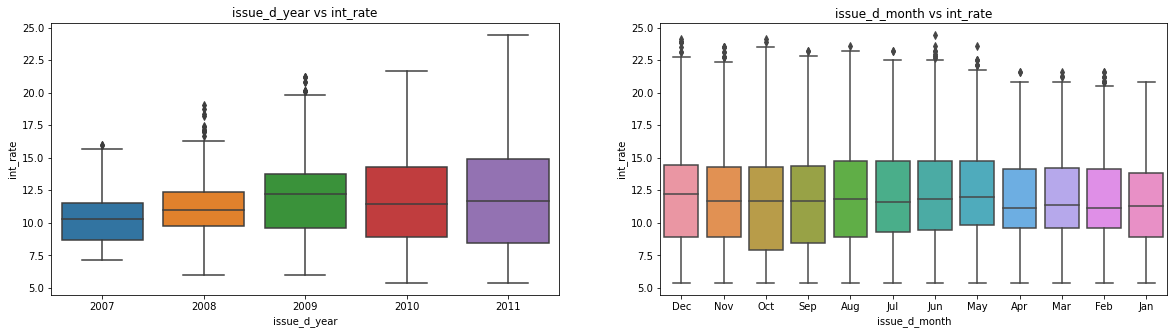

In [1531]:
segment_plots(loan,var1 = "issue_d_year",var2 = "int_rate",var3 = "issue_d_month")

**observations**:
    As the years of business increases the interest rates are getting more diversed
    notmuch relation between interest rate and issue_date_month
    

## Annual Income

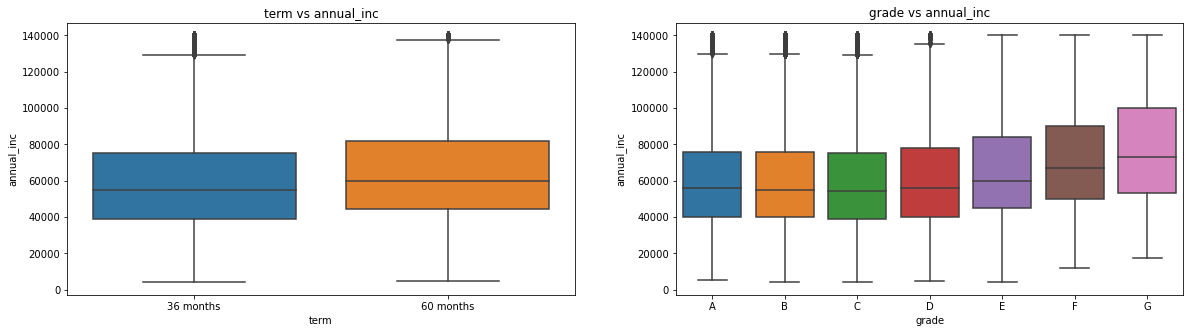

In [1532]:
segment_plots(loan,var1 = "term",var2 = "annual_inc",var3 = "grade")

**observations**:
   - annaul_income is almost same for both 36 and 60 month tenures as 60 months tennure is little higher annual_income
   - annual income is higher for F and G grades
    

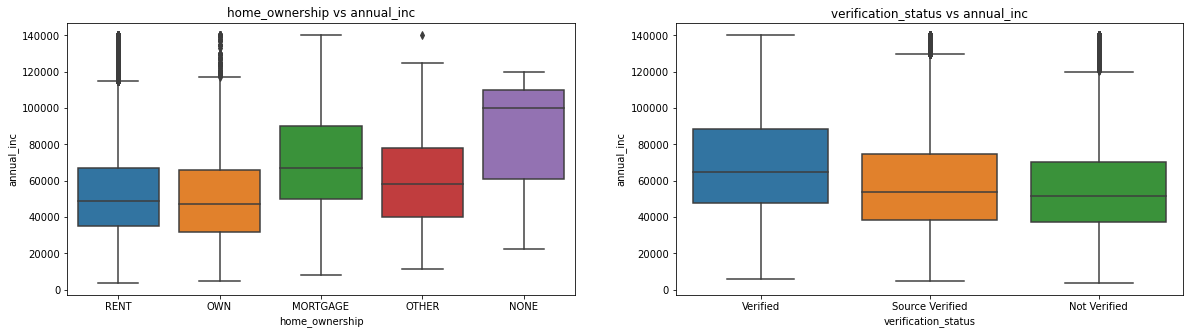

In [1533]:
segment_plots(loan,var1 = "home_ownership",var2 = "annual_inc",var3 = "verification_status")

**observations**:
- NONE home_ownership has highest annual_income and distribution is more below the medianas we see from above plots NONE has taken less loan amount and interest rates
- Borrowers who has highest annual-income are most verified

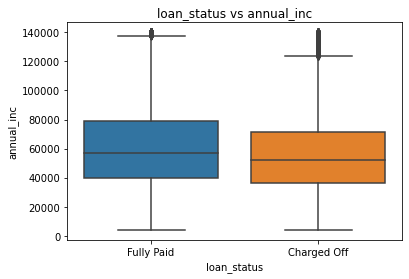

In [1534]:
segment_plots(loan,var1 = "loan_status",var2 = "annual_inc",var3 = None)

**observations**:
 - Current status of loan is Fully paid for  most of the borrowers who had higher annual incomes 

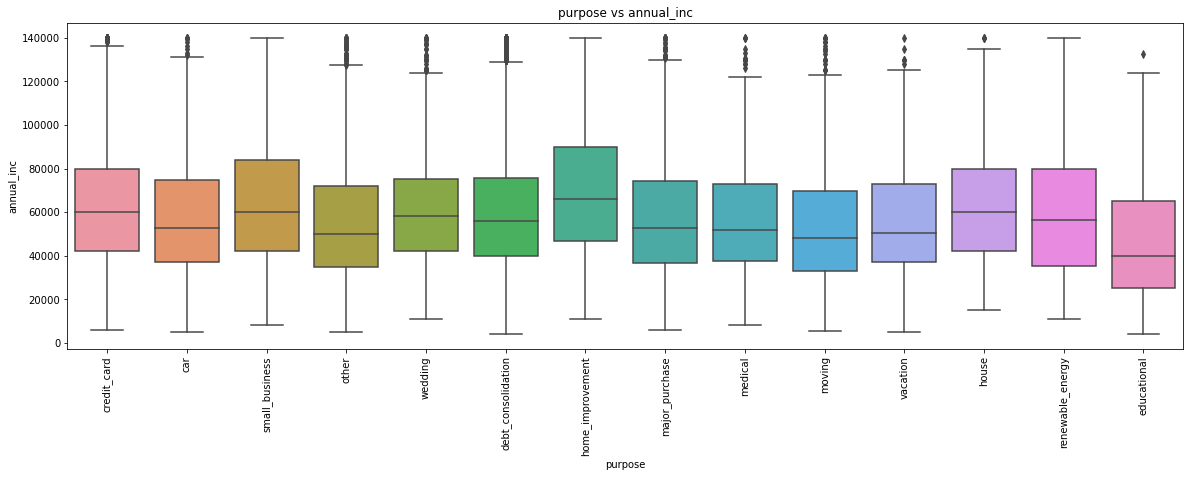

In [1535]:
segment_plots(loan,var1 = "purpose",var2 = "annual_inc",var3 = None)

**observations**:
 - home_improvement has higher annual_income provided by borrower's during loan request

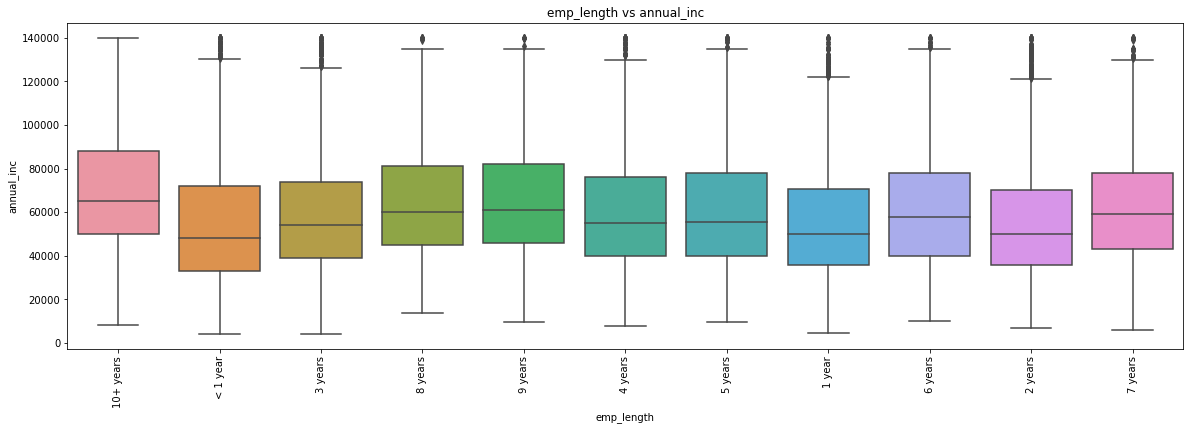

In [1536]:
segment_plots(loan,var1 = "emp_length",var2 = "annual_inc",var3 = None)

**observations**:
 - The borrower's who has highest annual income have taken loans for 10+ years duration

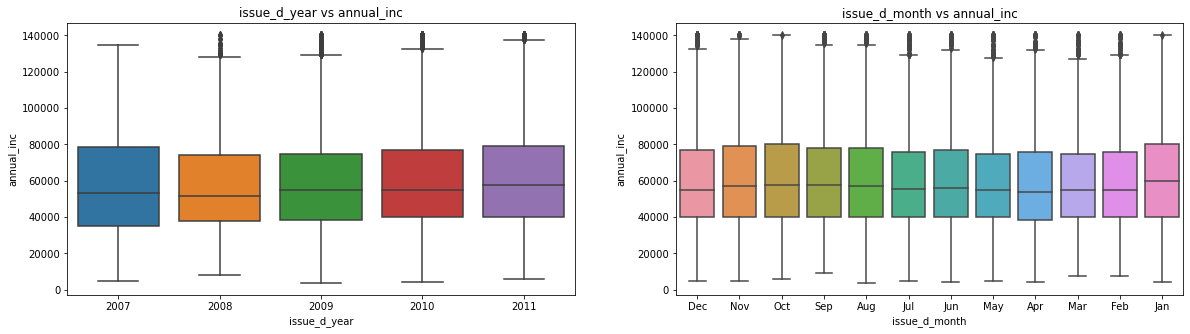

In [1537]:
segment_plots(loan,var1 = "issue_d_year",var2 = "annual_inc",var3 = "issue_d_month")

**observations**:
 - Borrowers annual income is little high for the year 2007 comparatively others
  - annual income does not have impact with the month when the loan was funded

### Debt to income

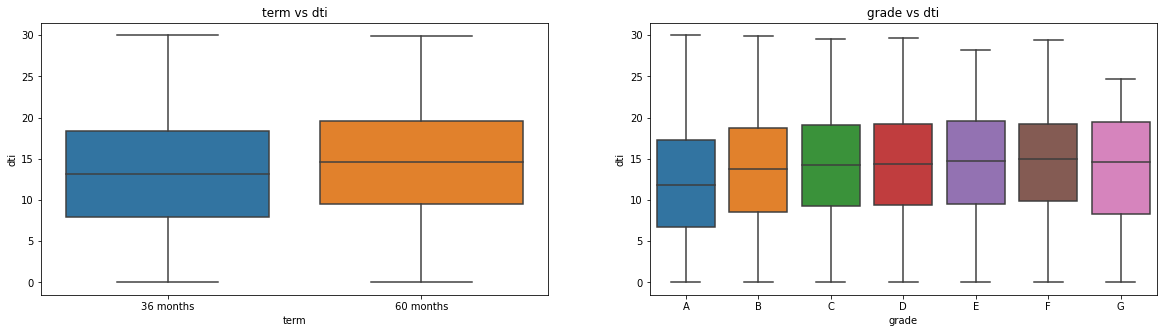

In [1538]:
segment_plots(loan,var1 = "term",var2 = "dti",var3 = "grade")

**observations**:
 - dti is bit high for the borrowers who took tenure of 60 months
 - A Grade borrowers has low DTI comparing others

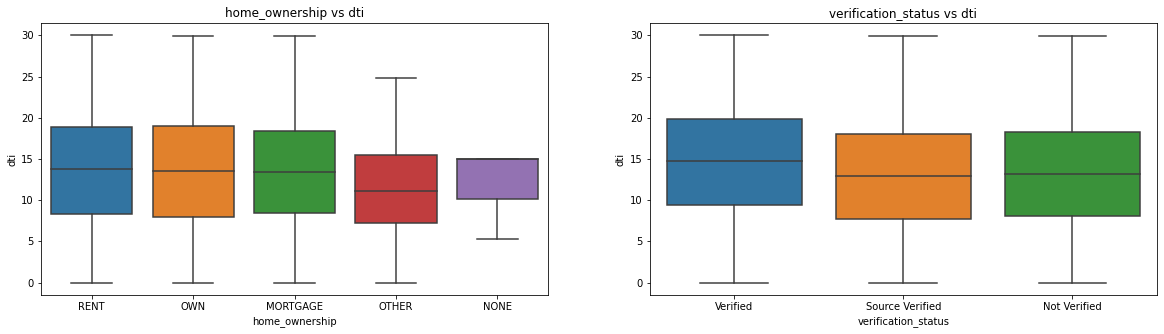

In [1539]:
segment_plots(loan,var1 = "home_ownership",var2 = "dti",var3 = "verification_status")

**observations**:
 - The OTHER has lowest dti.ignore NONE home_ownership it is drawn properly
 - the broower's who has high dti are most verified

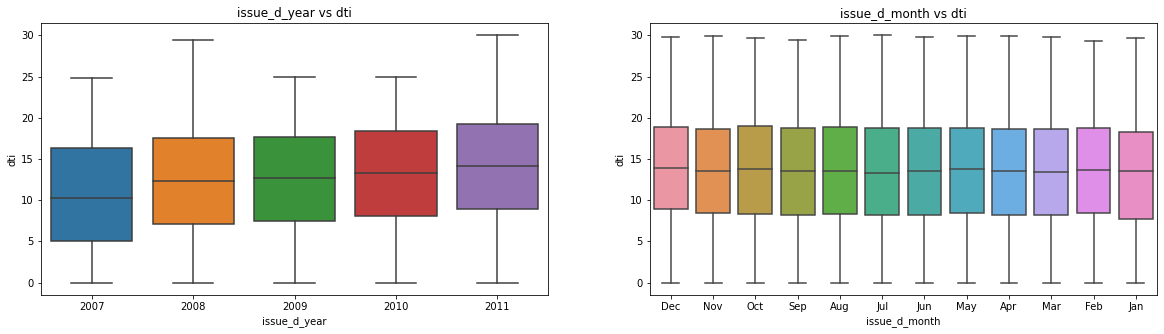

In [1540]:
segment_plots(loan,var1 = "issue_d_year",var2 = "dti",var3 = "issue_d_month")

**observations**:
 - DTI increases as distibution is diversed over the years
 - DTI has does not have impact on the months

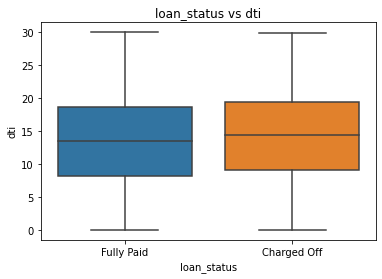

In [1541]:
segment_plots(loan,var1 = "loan_status",var2 = "dti",var3 = None)

**observations**:
 - The borrower's with high DTI has bit more probability to default

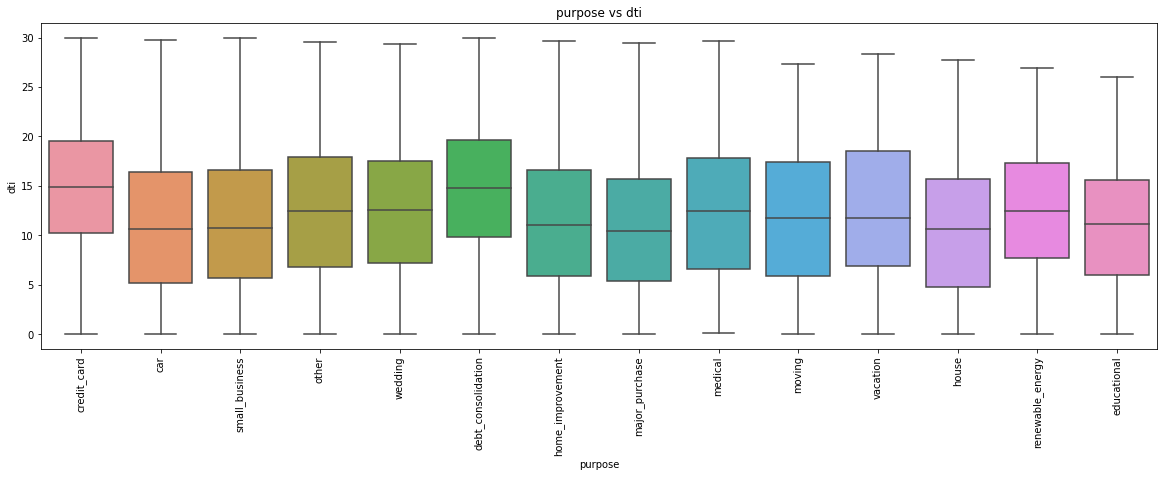

In [1542]:
segment_plots(loan,var1 = "purpose",var2 = "dti",var3 = None)

**observations**:
 - The borrower's who has took loan for credt_card and debt_consolidation has more DTI than others

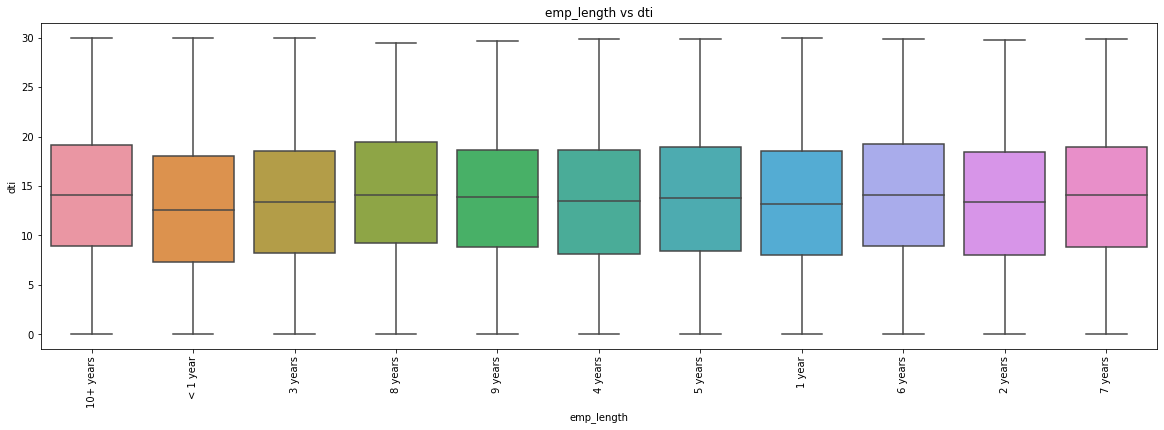

In [1543]:
segment_plots(loan,var1 = "emp_length",var2 = "dti",var3 = None)

**observations**:
 - The Dti is much similar for borrowers with all the employment length

In [1544]:
 ### creating a  functions for the analysis of categorical variable against contineous variable
def contwithcatvar_barplot(df,var1,var2,var3=None): 
        if var3 is None:
            plt.figure(figsize=(25,6))
            data = df.groupby([var1,var2],as_index = False)['id'].count()
            data['prop'] = data.groupby(var1).transform(lambda x: x/x.sum())
            sns.barplot(x=var1,y='prop',hue=var2,data = data)
            plt.title(var2 + ' vs ' + var1)
        elif(var3 is None) & (var1=="purpose") | (var1=="emp_length"):
            plt.figure(figsize=(25,6))
            data = df.groupby([var1,var2],as_index = False)['id'].count()
            data['prop'] = data.groupby(var1).transform(lambda x: x/x.sum())
            sns.barplot(x=var1,y='prop',hue=var2,data = data)
            plt.xticks(rotation=90)
            plt.title(var2 + ' vs ' + var1)
        else:
            data = df.groupby([var1,var2],as_index = False)['id'].count()
            data['prop'] = data.groupby(var1).transform(lambda x: x/x.sum())
            plt.figure(figsize=(20,5))
            plt.subplot(121)
            sns.barplot(x=var1,y='prop',hue=var2,data = data)
            plt.title(var2 + ' vs ' + var1)
            plt.subplot(122)
            plt.title(var3 + ' vs ' + var1)
            data = df.groupby([var1,var3],as_index = False)['id'].count()
            data['prop'] = data.groupby(var1).transform(lambda x: x/x.sum())
            sns.barplot(x=var1,y='prop',hue=var3,data = data)
            
        
        

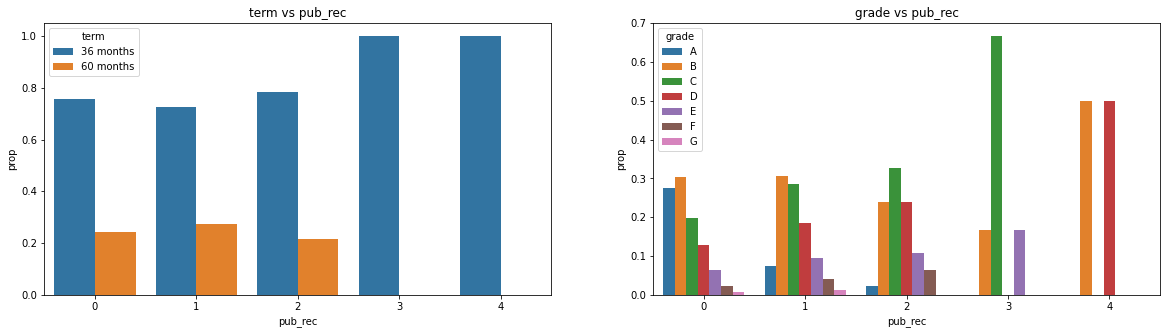

In [1545]:
contwithcatvar_barplot(df=loan,var1="pub_rec",var2="term",var3='grade')

**observations**:
 - Borrowers higher public derogatory records took a loan for 36 months tenure where as 80% and 20% distribution between 36 and 60 months for lower public derogatory records
 - A Grade has less public derogatory records than others
 - B,C and D Grades have high public derogatory records
    
    

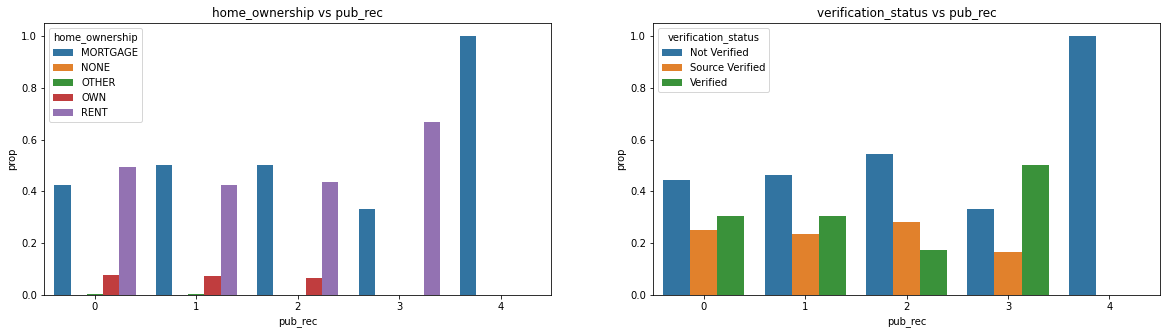

In [1546]:
contwithcatvar_barplot(df=loan,var1="pub_rec",var2="home_ownership",var3='verification_status')

**observations**:
 - Borrowers with 4 public derogatory records are high in MORTGAGE category
 - high public derogatory records for Non verified borrowers

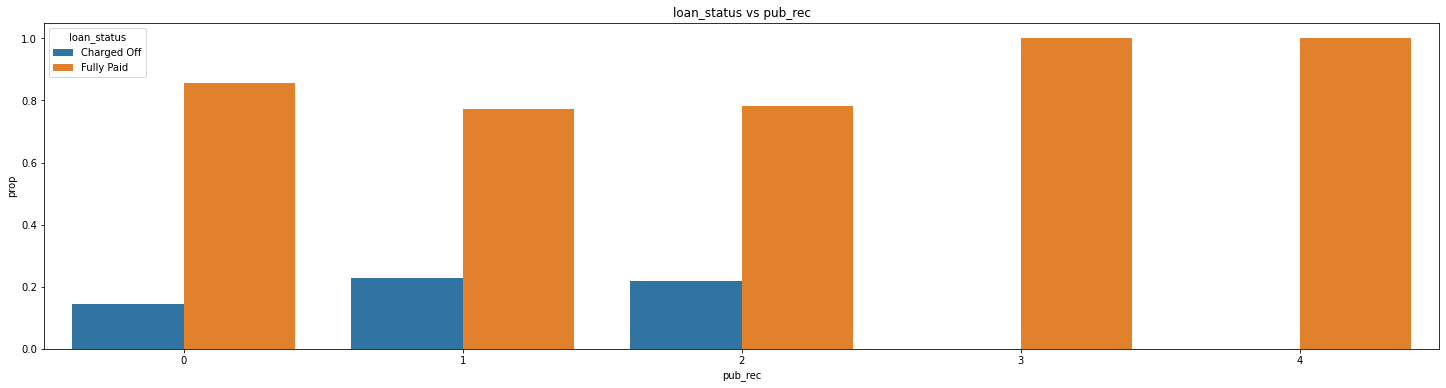

In [1547]:
contwithcatvar_barplot(df=loan,var1="pub_rec",var2="loan_status",var3=None)

**observations**:
 - Borrowers with high public derogatory records are fully paid
 - Aw we see there are some deafults for public derogatory records from 0 to 2

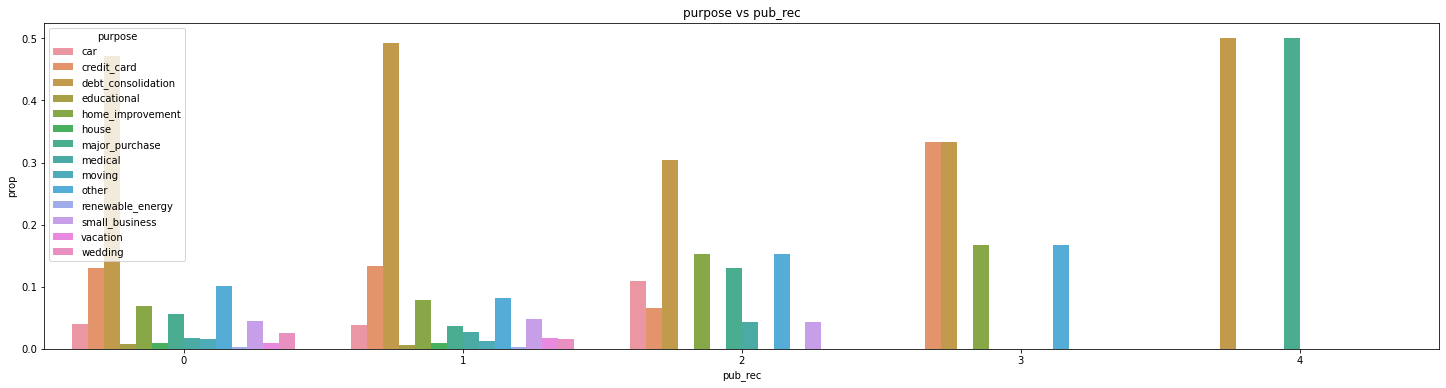

In [1548]:
contwithcatvar_barplot(df=loan,var1="pub_rec",var2="purpose",var3=None)

**observations**:
 - Borrowers with high public derogatory records are mostly took a loan for credit card,debt consolidationa and house purpose
 

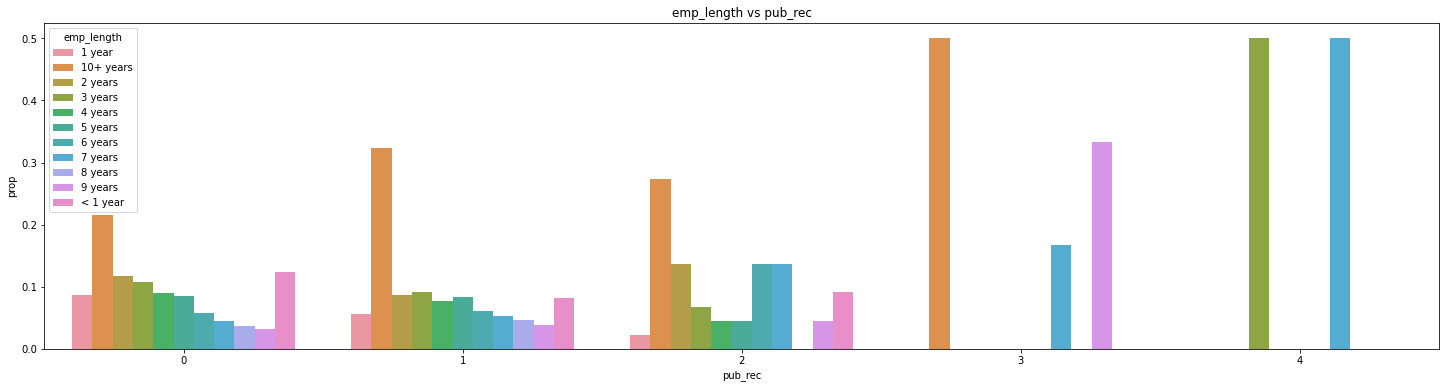

In [1549]:
contwithcatvar_barplot(df=loan,var1="pub_rec",var2="emp_length",var3=None)

**observations**:
 - Borrowers with high public derogatory records having the max experience of 4years,7 years and 10+years
 

### pub_rec_bankruptcies

In [1551]:
## creating a functions for public records bankruptcies
def contwithcatvar_countplot(df,var1,var2,var3=None): 
        if var3 is None:
            plt.figure(figsize=(20,5))
            sns.countplot(x=var1,hue=var2,data = df)
            plt.title(var2 + ' vs ' + var1)
        elif(var3 is None) & (var1=="purpose") | (var1=="emp_length"):
            plt.figure(figsize=(20,5))
            sns.countplot(x=var1,hue=var2,data = df)
            plt.title(var2 + ' vs ' + var1)
            plt.xticks(roation=90)
        else:
            plt.figure(figsize=(20,5))
            plt.subplot(121)
            sns.countplot(x=var1,hue=var2,data = df)
            plt.title(var2 + ' vs ' + var1)
            plt.subplot(122)
            plt.title(var3 + ' vs ' + var1)
            sns.countplot(x=var1,hue=var3,data = df)

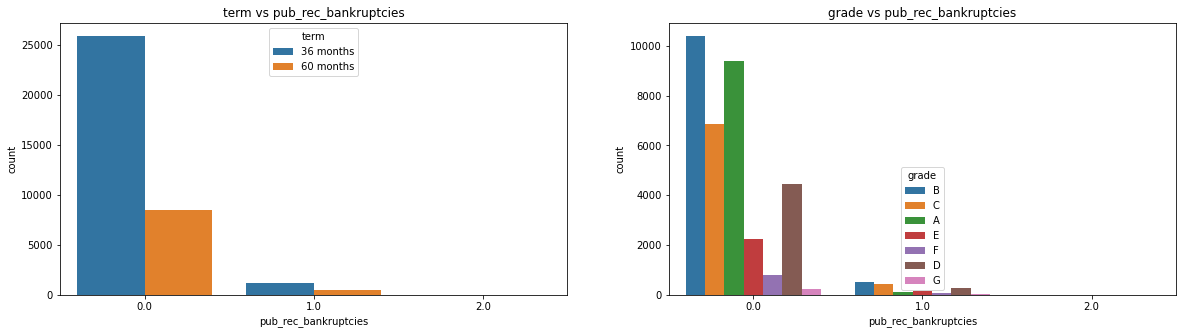

In [1552]:
contwithcatvar_countplot(df=loan,var1="pub_rec_bankruptcies",var2='term',var3='grade')

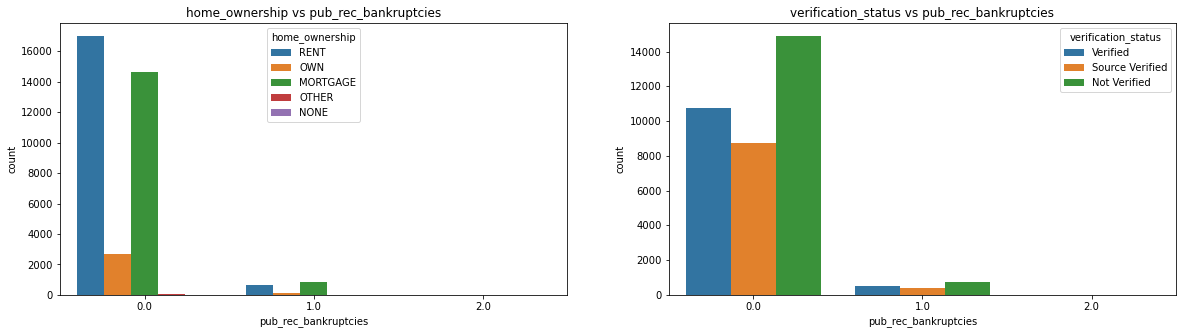

In [1553]:
contwithcatvar_countplot(df=loan,var1="pub_rec_bankruptcies",var2='home_ownership',var3='verification_status')

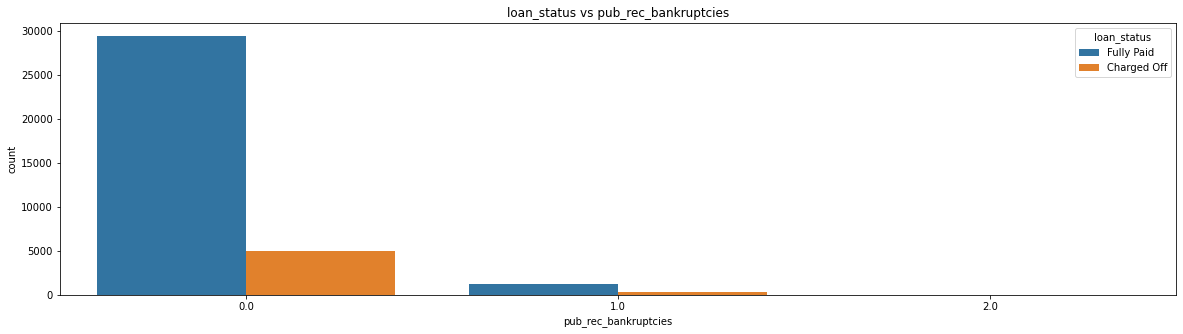

In [1554]:
contwithcatvar_countplot(df=loan,var1="pub_rec_bankruptcies",var2='loan_status',var3=None)

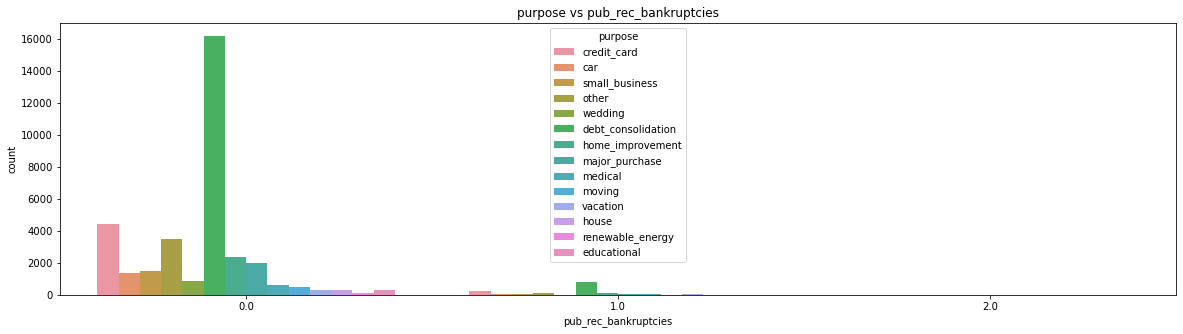

In [1555]:
contwithcatvar_countplot(df=loan,var1="pub_rec_bankruptcies",var2='purpose',var3=None)

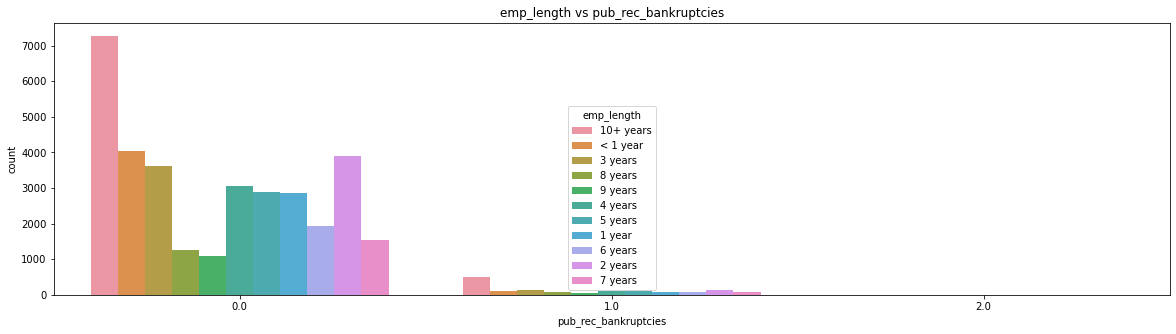

In [1556]:
contwithcatvar_countplot(df=loan,var1="pub_rec_bankruptcies",var2='emp_length',var3=None)

**observations**
  - Borrowers high pub_rec_bankruptcies took 36 months tenure
  - Grade A,B and C having high pub_rec_bankruptcies
  - Borrowers high pub_rec_bankruptcies has a MORTARAGE and RENT  home ownership
  - Borrowers who has high pub_rec_bankruptcies are not verified
  - Borrowers are high in Full paid,experience of 10+ years and devt_consolidation for pub_rec_bankruptcies
 


## Bivariate analysis

### Term vs Loan Status

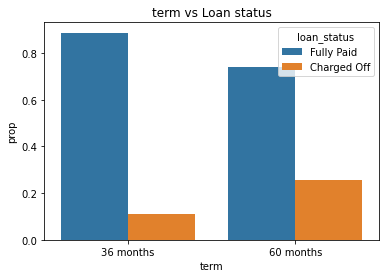

In [1638]:
## writing a function for catergorical variable analysis
def cat_prop_plot(df,var):
    if(var == "purpose"):
        ## proportion of values for each category
        prop_data = df.groupby([var,'loan_status'],as_index=False)['id'].count()
        prop_data['prop'] = prop_data.groupby(var).transform(lambda x: x/x.sum())
        prop_data = prop_data[prop_data.loan_status == "Charged Off"]
        plt.figure(figsize=(20,6))
        sns.barplot(x=var,y='prop',data=prop_data)
        plt.xticks(rotation=90)
        plt.title(var + ' vs Loan status(Charged Off)')
        plt.show()
    else:
        prop_data = df.groupby([var,'loan_status'],as_index=False)['id'].count()
        prop_data['prop'] = prop_data.groupby(var).transform(lambda x: x/x.sum())
        sns.barplot(x=var,y='prop',hue='loan_status',data=prop_data,hue_order=['Fully Paid','Charged Off'])
        plt.title(var + ' vs Loan status')
        plt.show()
        
  
    
cat_prop_plot(df=loan,var="term")


**observations**:
 - Majority of the borrowers are fully paid and higher in 36 months
 - More proportion of borrowers defaulted loan in 60 months tenure than 36 months

### Lets see analysis of categorical variables against contineous variable

### Term vs Loan amount by loan status

In [1621]:
## writing a default function 

def catergorical_plots(var1,var2,var3,df):
    if(var1 == 'grade'):
        grades_order = df.grade.unique()
        grades_order.sort()
        plt.figure(figsize=(20,5))
        plt.subplot(121)
        sns.boxplot(x=var1,y=var2,hue=var3,data = df,order=grades_order)
        plt.title(var1 + ' vs ' + var2)
        plt.subplot(122)
        plt.title(var1 + ' vs ' + var2)
        sns.barplot(x=var1,y=var2,hue=var3,data = df,order=grades_order,estimator=np.median)
        plt.show()
    elif(var1 == 'purpose') | (var1 == 'emp_length'):
        plt.figure(figsize=(20,6))
        sns.boxplot(x=var1,y=var2,hue=var3,data = df)
        plt.title(var1 + ' vs ' + var2)
        plt.xticks(rotation=90)
        plt.figure(figsize=(20,6))
        plt.title(var1 + ' vs ' + var2)
        sns.barplot(x=var1,y=var2,hue=var3,data = df,estimator=np.median)
        plt.xticks(rotation=90)
        plt.show()
    else:
        plt.figure(figsize=(20,5))
        plt.subplot(121)
        sns.boxplot(x=var1,y=var2,hue=var3,data = df)
        plt.title(var1 + ' vs ' + var2)
        plt.subplot(122)
        plt.title(var1 + ' vs ' + var2)
        sns.barplot(x=var1,y=var2,hue=var3,data = df,estimator=np.median)
        plt.show()
        
        
    

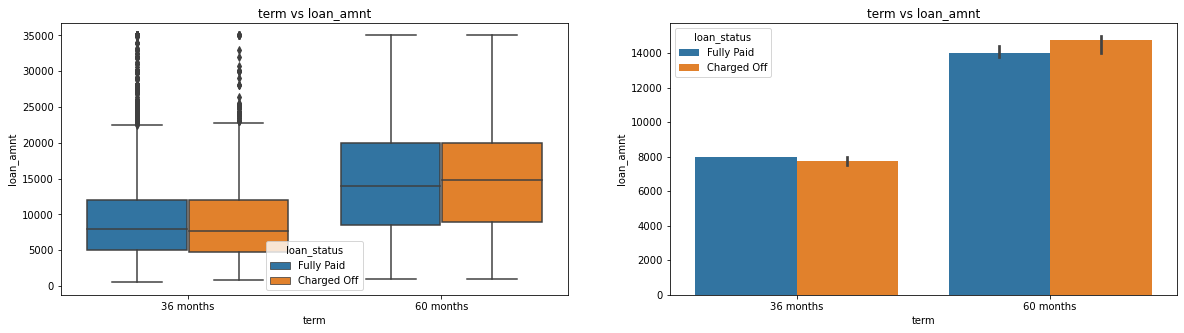

In [1622]:
catergorical_plots(var1="term",var2="loan_amnt",var3="loan_status",df=loan)

**observations**:
- Loan amount is not a decider for defaults in 36 and 60 months tenure
- Borrowers have equal distribution isboth default and non default for 36 and 60 month tenures

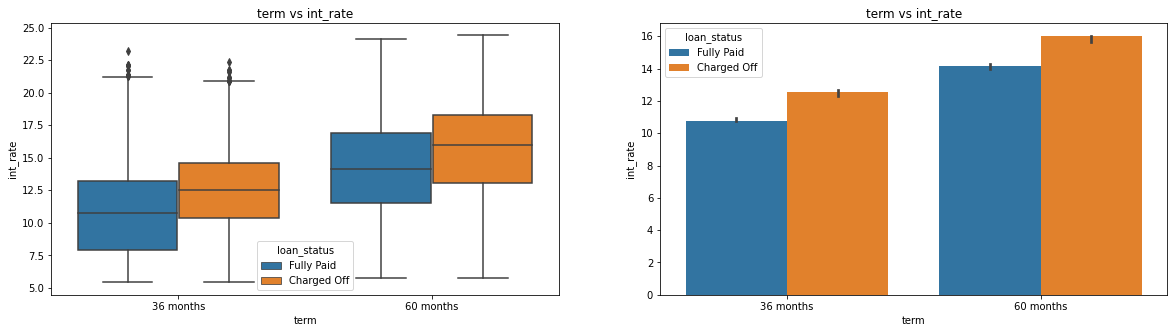

In [1623]:
catergorical_plots(var1="term",var2="int_rate",var3="loan_status",df=loan)

**observations**:
- interest rate has highest default rates in both 36 and 60 months tenure


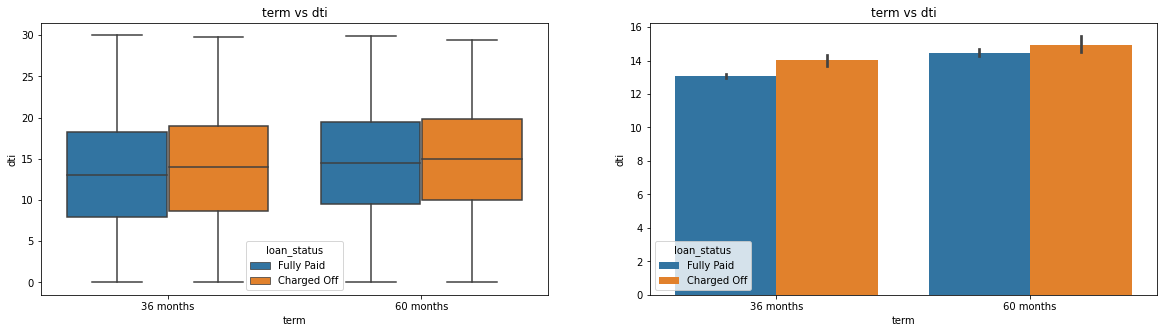

In [1624]:
catergorical_plots(var1="term",var2="dti",var3="loan_status",df=loan)

**observations**:
- Comparatively Charge Off are higher than Fully Paid for debt to income

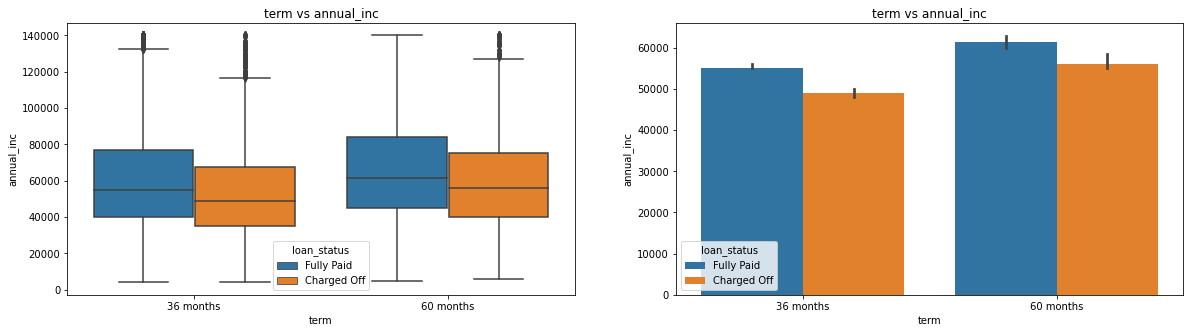

In [1625]:
catergorical_plots(var1="term",var2="annual_inc",var3="loan_status",df=loan)

**observations**:
- Fully paid are higher for the Borrowers with annual income for both 36 and 60 month tenures


## Grade

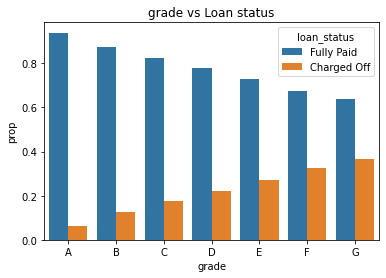

In [1626]:
### sorting the ordersf from A to G
grades_order = loan.grade.unique()
grades_order.sort()
## proportion of values for each category

cat_prop_plot(df=loan,var="grade")

**observations**:
- above graph clearly says Charged off increases has grades decreases

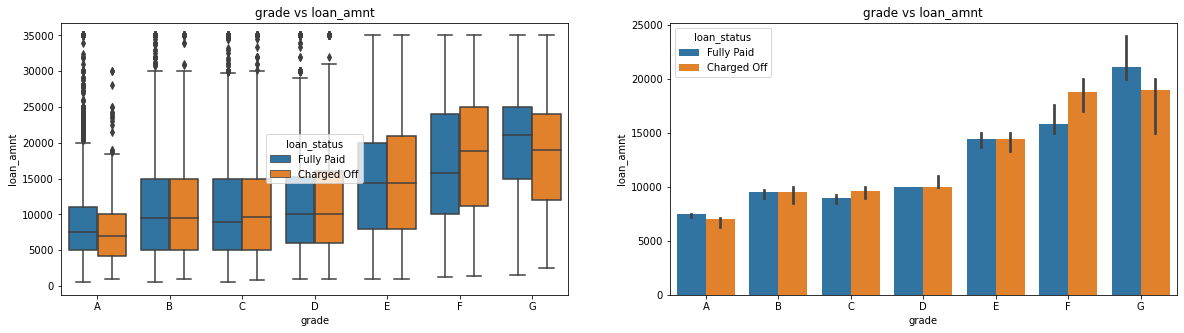

In [1627]:
catergorical_plots(var1="grade",var2="loan_amnt",var3="loan_status",df=loan)

**observations**:
- As lower grade E,F,G has taken highest loan amount and A,B,C,D took a small amount but rate of defaulting a loan against loan_amount is same for all grades

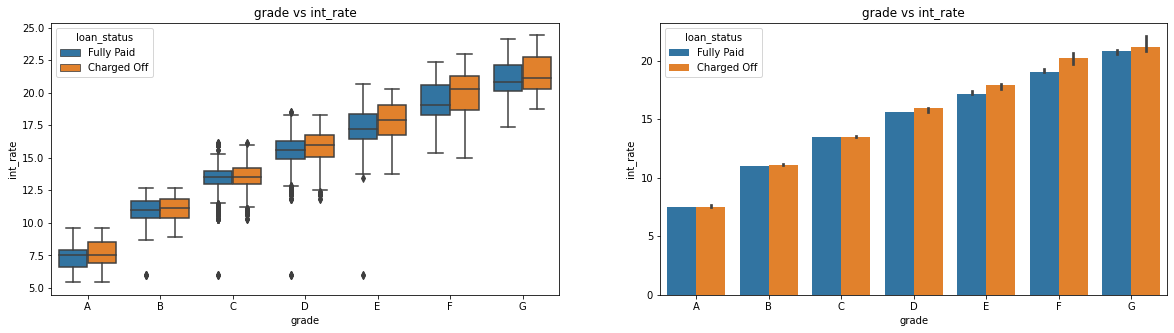

In [1628]:
catergorical_plots(var1="grade",var2="int_rate",var3="loan_status",df=loan)

**observations**:
- As we see from the graph,interest rate increases as grade decreases so borrowers most prone to default the loan


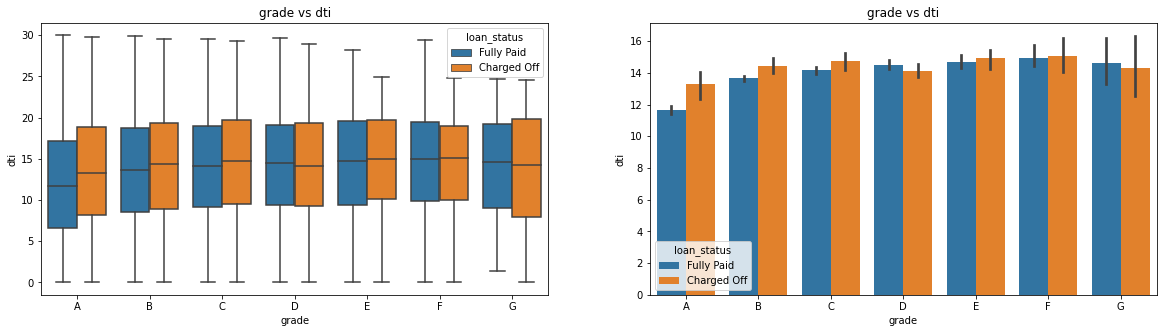

In [1608]:
catergorical_plots(var1="grade",var2="dti",var3="loan_status",df=loan)

**observations**:
- not much changes in dti in each grade and loan status

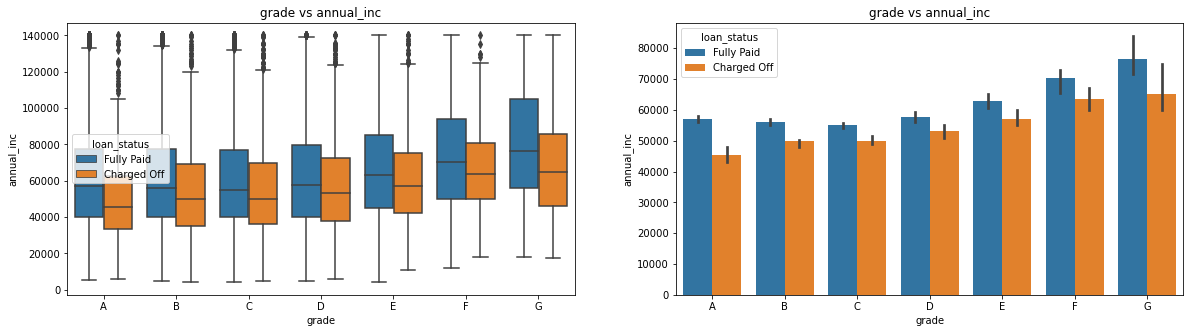

In [1629]:
catergorical_plots(var1="grade",var2="annual_inc",var3="loan_status",df=loan)

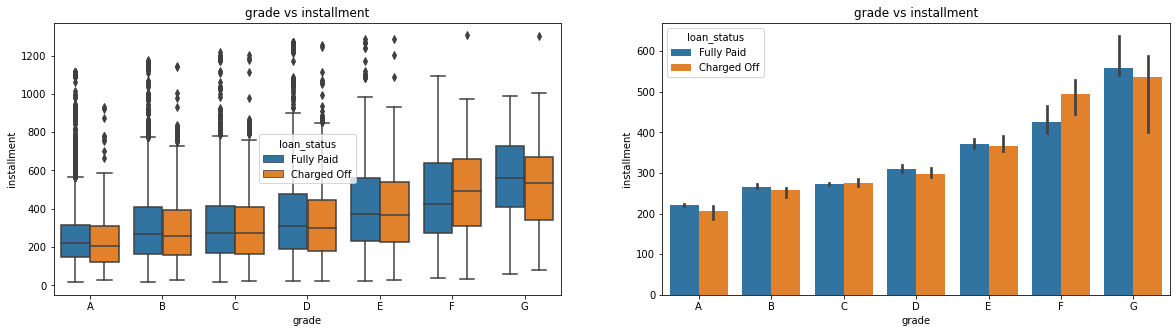

In [1630]:
catergorical_plots(var1="grade",var2="installment",var3="loan_status",df=loan)

**observations**:
- the borrowers who fall into F grade are highest defaulting the loan

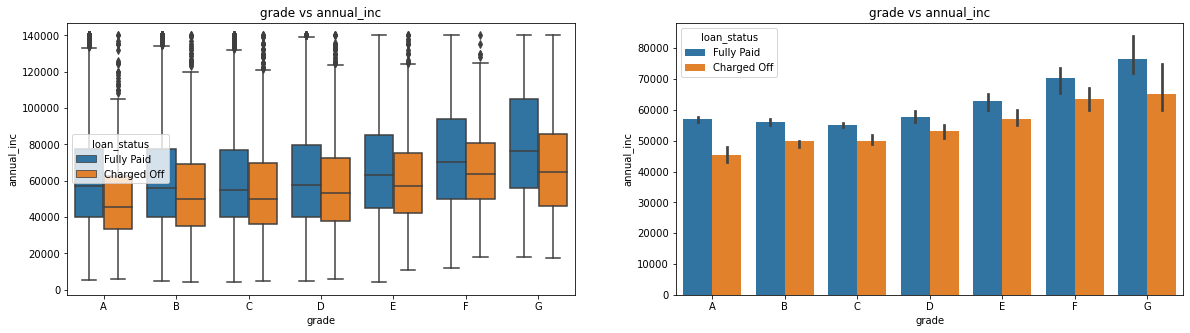

In [1631]:
catergorical_plots(var1="grade",var2="annual_inc",var3="loan_status",df=loan)

**observations**:
- Borrowers with highest annual income is increasing as per as grades and they are fully paid

### Employment length

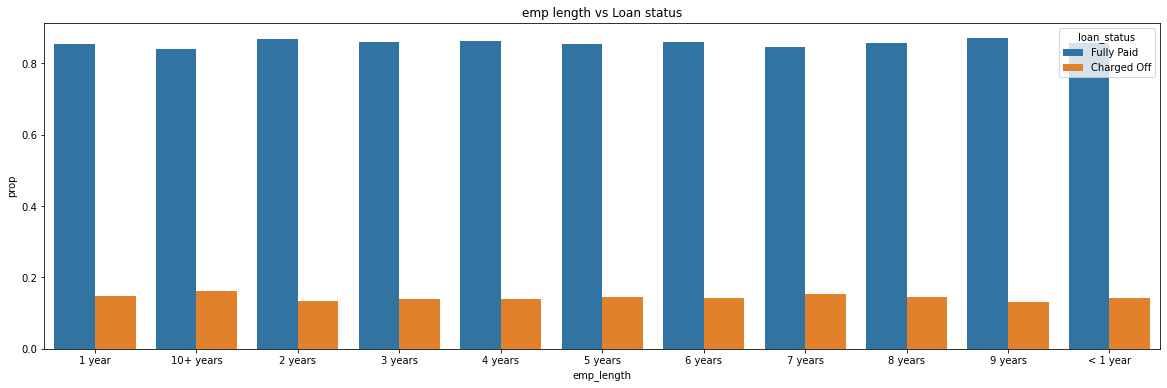

In [1632]:
## proportion of values for each category
plt.figure(figsize=(20,6))
grade_data = loan.groupby(['emp_length','loan_status'],as_index=False)['id'].count()
grade_data['prop'] = grade_data.groupby('emp_length').transform(lambda x: x/x.sum())
sns.barplot(x='emp_length',y='prop',hue='loan_status',data=grade_data,hue_order=['Fully Paid','Charged Off'])
plt.title('emp length vs Loan status')
plt.show()

**observations**:
- Borrowers with experience are highly full paid and less borrowers are Charged Off
- there is no significant change in experience of employee length

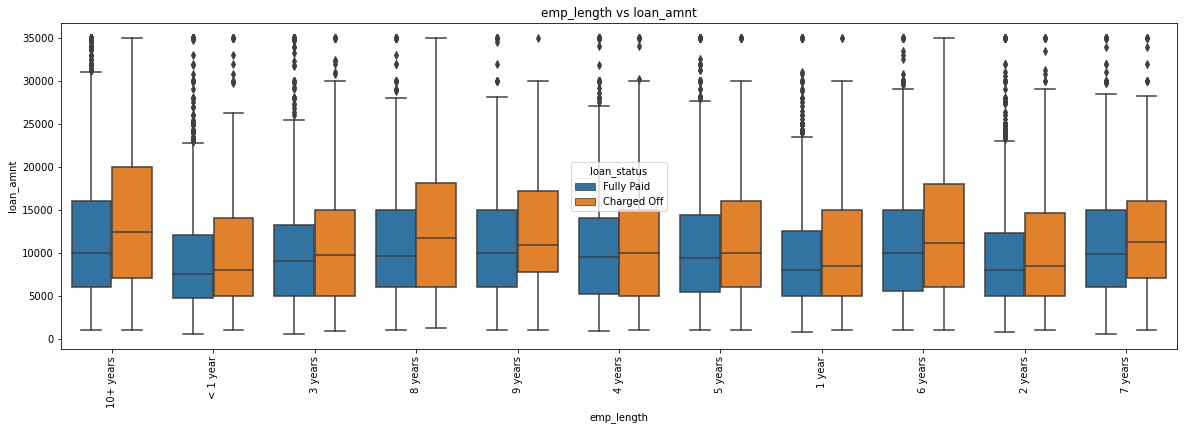

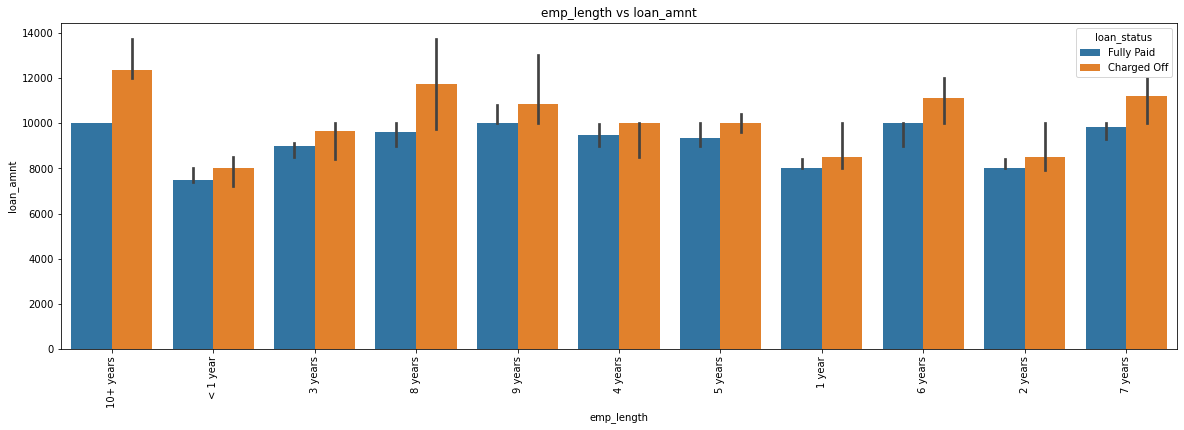

In [1633]:
catergorical_plots(var1="emp_length",var2="loan_amnt",var3="loan_status",df=loan)

**observations**:
- borrowers with almost all the experience and are Charged Off 
- Borrowers the experience 10+ years and 8 years took loan amount are prone to default
 

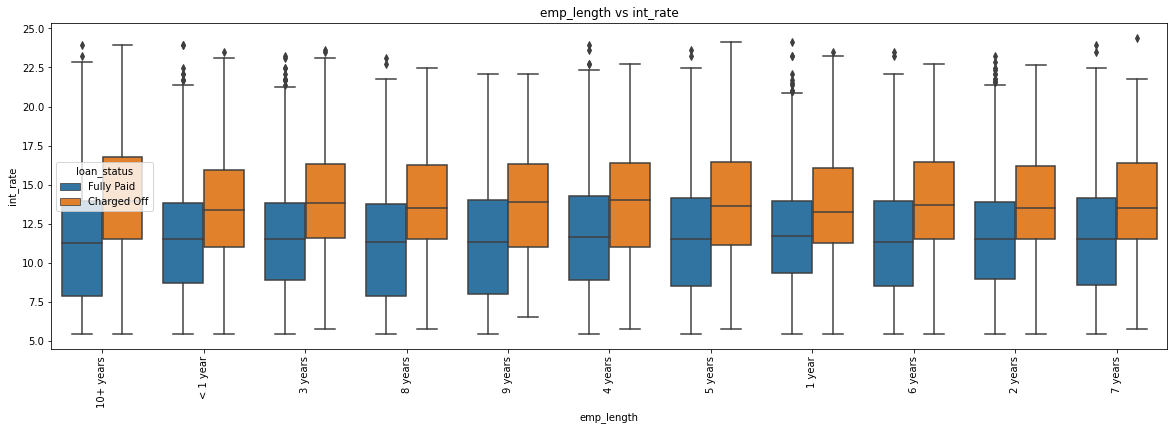

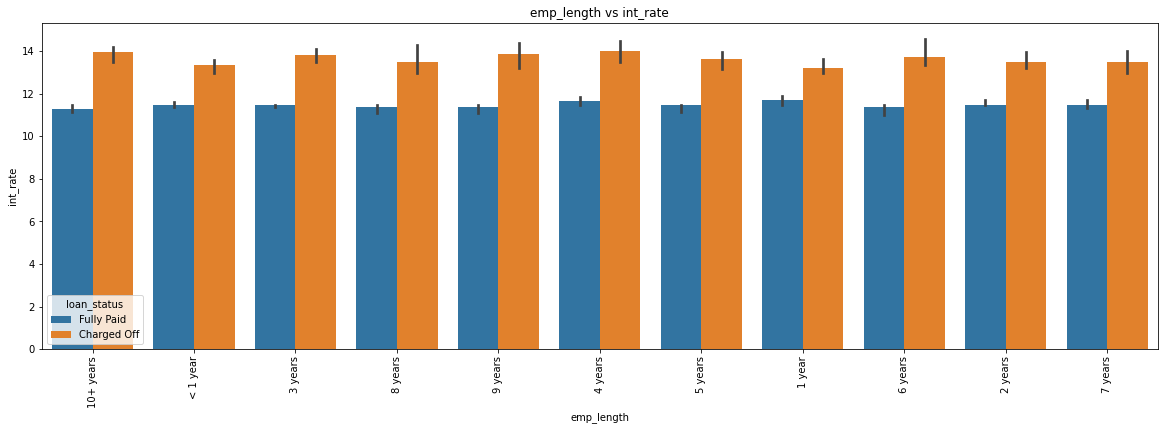

In [1634]:
catergorical_plots(var1="emp_length",var2="int_rate",var3="loan_status",df=loan)

**observations**:
- borrowers with almost all the experience and are Charged Off 
- as higher the interest rate chance of more defaulted loan
- interest rate does not have impact on emp_length

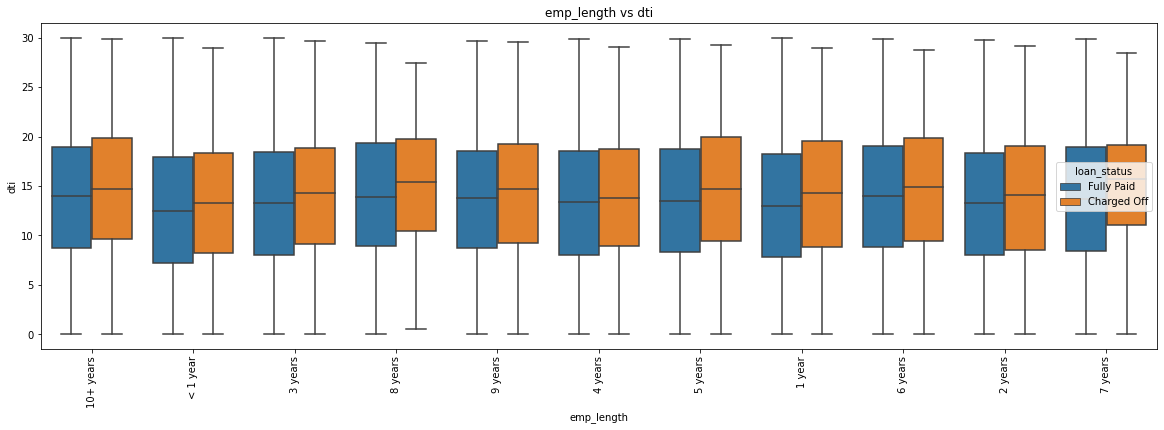

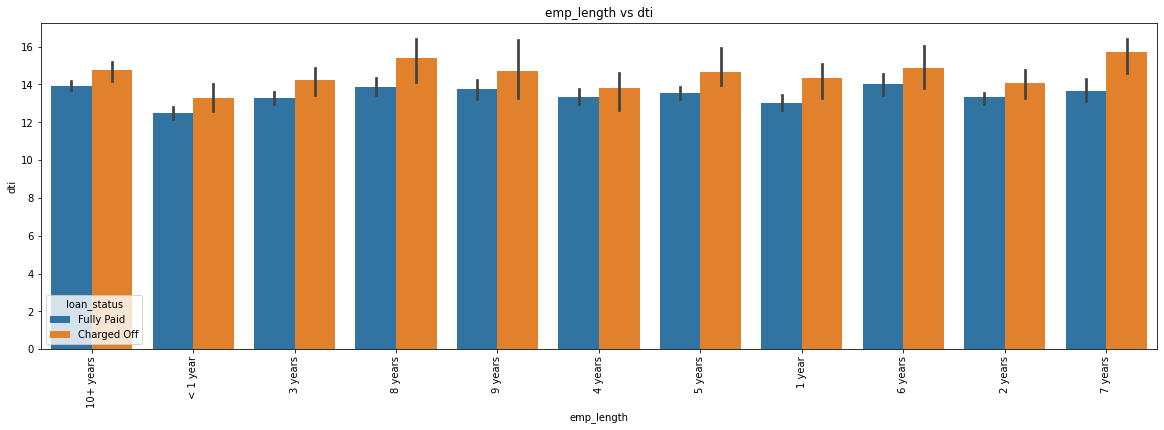

In [1635]:
catergorical_plots(var1="emp_length",var2="dti",var3="loan_status",df=loan)

**observations**:
- borrowers with almost all the experience and are Charged Off 
- Borrowers the experience 7 and 8 years took loan amount are prone to default

### Home Ownership

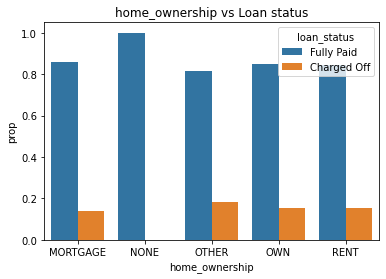

In [1636]:
cat_prop_plot(df=loan,var="home_ownership") ## calling the function

**observation**:
- There is bit high percentage of defaults are recorded in other home ownership category

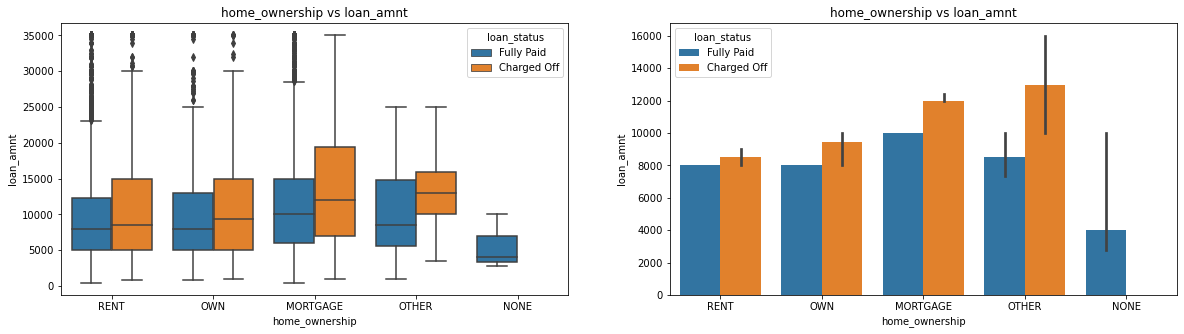

In [1618]:
catergorical_plots(var1="home_ownership",var2="loan_amnt",var3="loan_status",df=loan)

**observation**:
- Borrowers with high loan amount for MORTGAGE and OTHER ownership category has a high rate of defaults

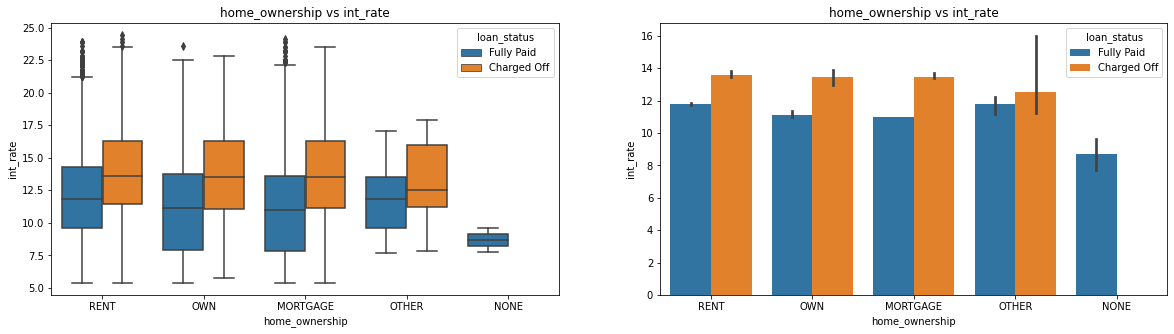

In [1619]:
catergorical_plots(var1="home_ownership",var2="int_rate",var3="loan_status",df=loan)

**observation**:
- irrespective of home_ownership,when the interest rate is high the default rate is also high


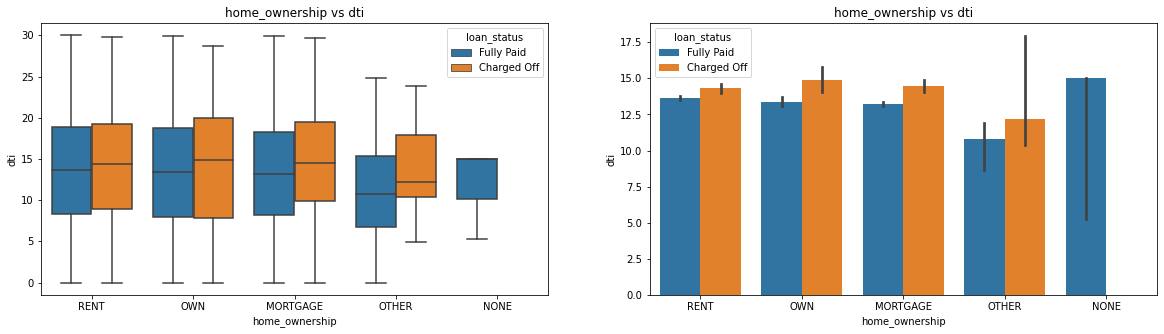

In [1575]:
catergorical_plots(var1="home_ownership",var2="dti",var3="loan_status",df=loan)

**observation**:
- Borrowers in other home ownership category has less dti than other categories
- There is equal possibility of home owners defaulting for all home_ownerships

### Verification Status

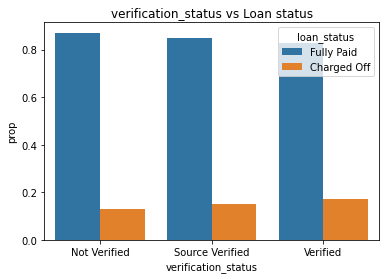

In [1576]:
cat_prop_plot(df=loan,var="verification_status")

**observations**:
    - Borrowers are high in proportion for fully paid loan and less proportion in defaulting the loan
    -as we see from graph as there is proportion of full paid decreases increase in default loan

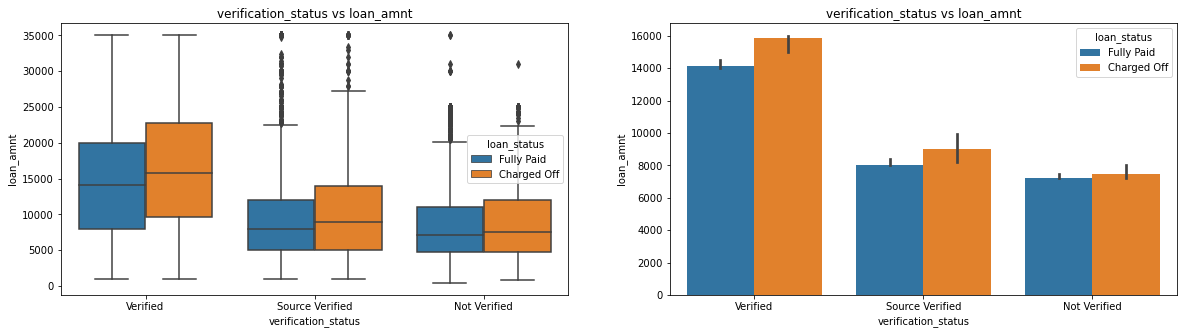

In [1577]:
catergorical_plots(var1="verification_status",var2="loan_amnt",var3="loan_status",df=loan)

**observation**:
- Verified loans are given more loan amounts compared to others
- all the verification status categories are defaulted loan than Fully Paid
- slight increase in loan amount for verified ans Source Verified when they are defaulted

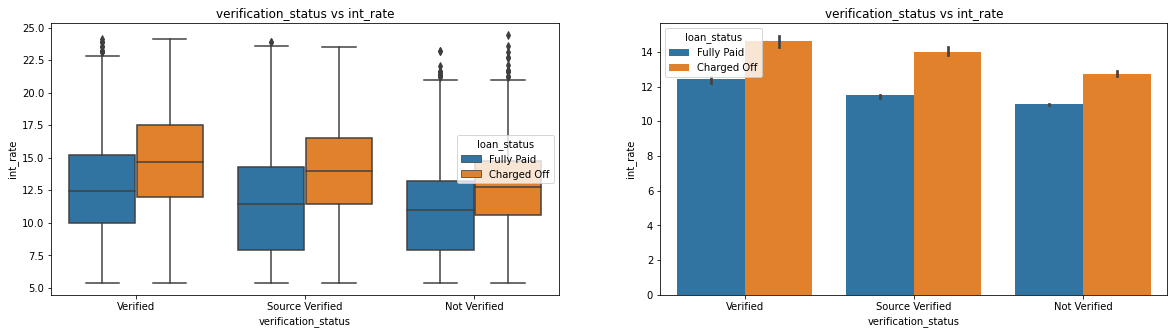

In [1578]:
catergorical_plots(var1="verification_status",var2="int_rate",var3="loan_status",df=loan)

**observation**:
- Borrowers with high interest rate for all verification status category are incurring default of loan

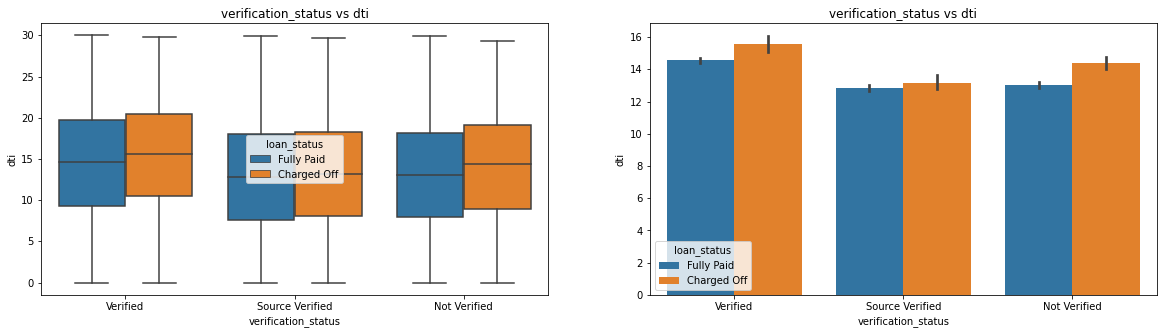

In [1579]:
catergorical_plots(var1="verification_status",var2="dti",var3="loan_status",df=loan)

**observation**:
- Borrowers with high dti rate for all verification status category are incurring default of loan
- Borrowers with Source verified category has less default of loan comparing others

## Purpose

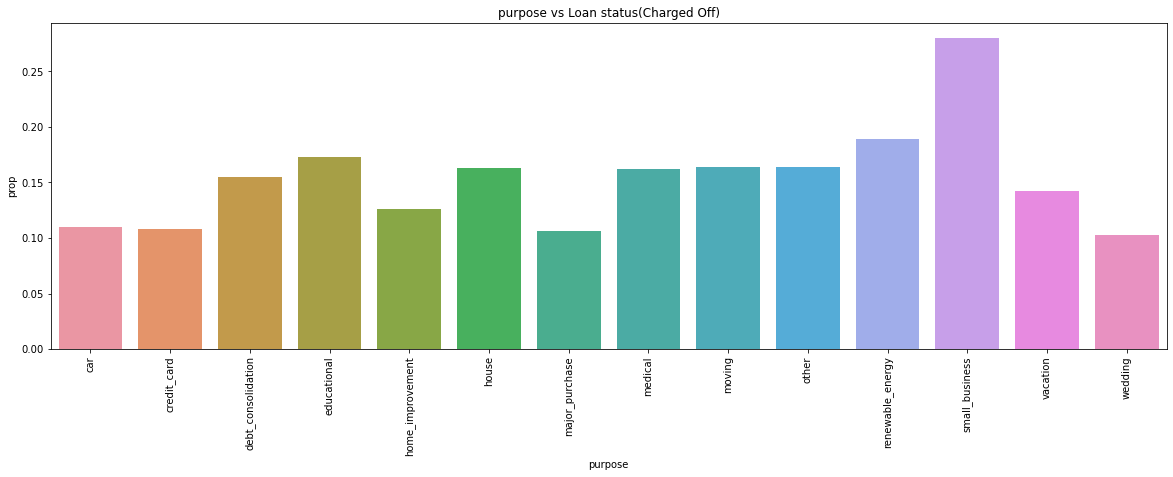

In [1639]:
cat_prop_plot(df=loan,var="purpose")

**observations**:
   - borrowers who took the loan for small business purpose have defaulted more.

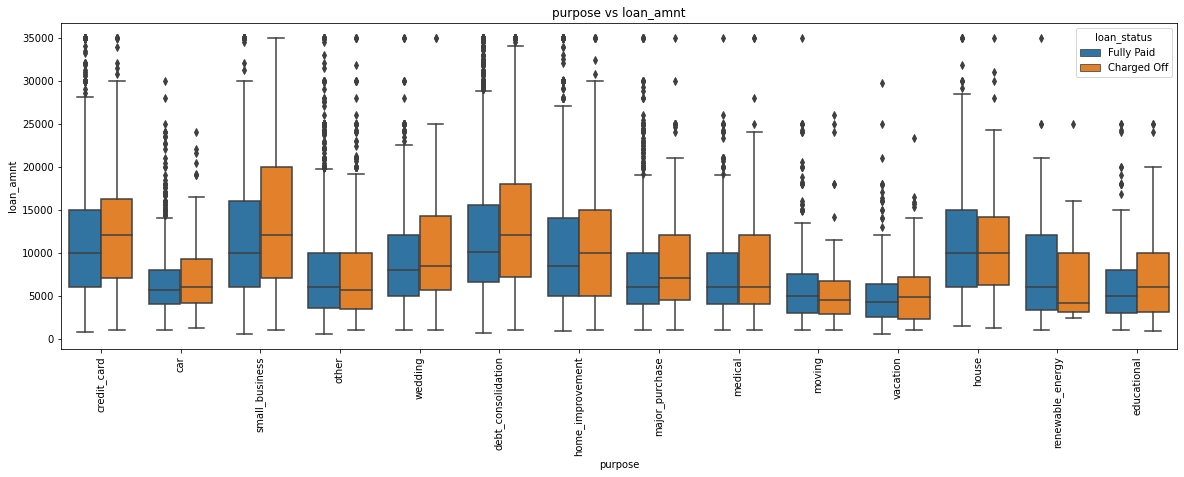

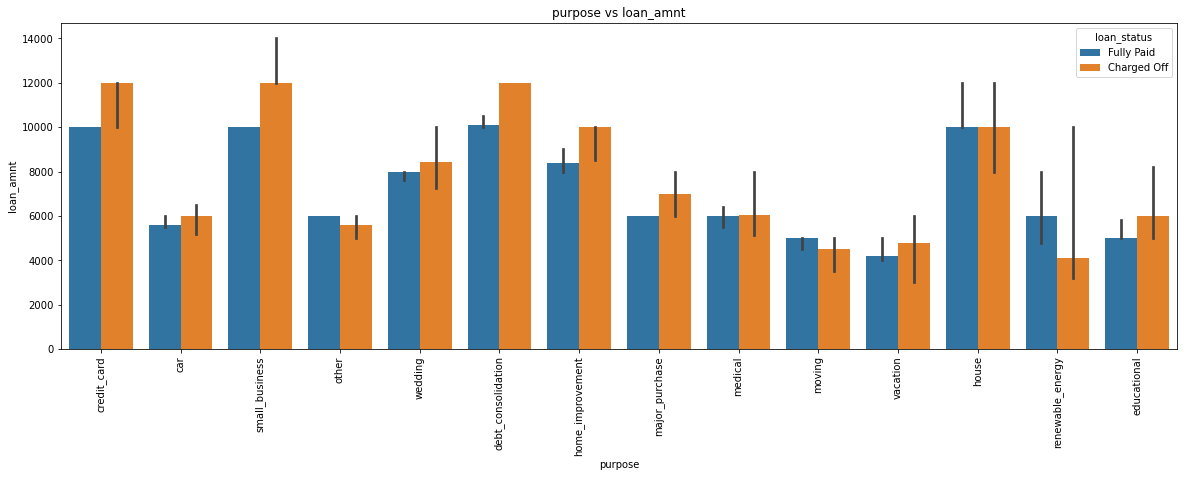

In [1581]:
catergorical_plots(var1="purpose",var2="loan_amnt",var3="loan_status",df=loan)

**observations**:
- credit card ,small business and debt_consolidation with highest loan amount are mostly to be defaulted

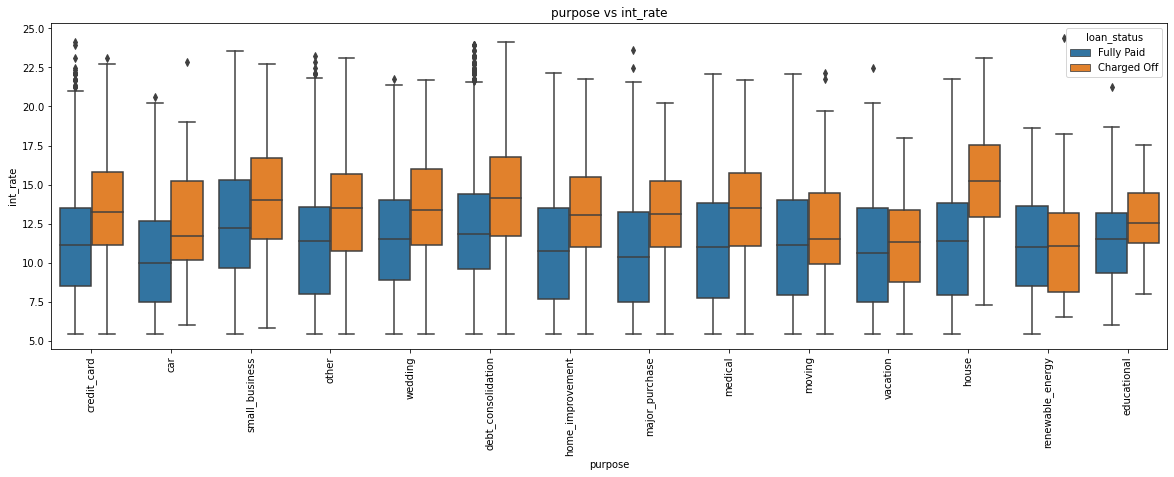

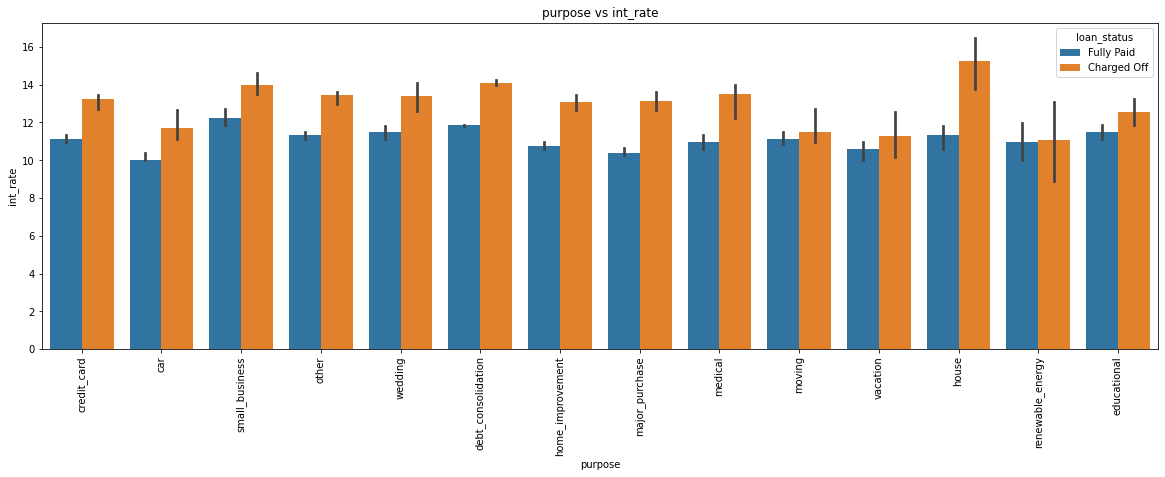

In [1582]:
catergorical_plots(var1="purpose",var2="int_rate",var3="loan_status",df=loan)

**observations**:
- Home loans with high interest rate are mostly defaulted.Even small business and debt consolidation has similar observation

#### Purpose vs loan_status for debt to amount

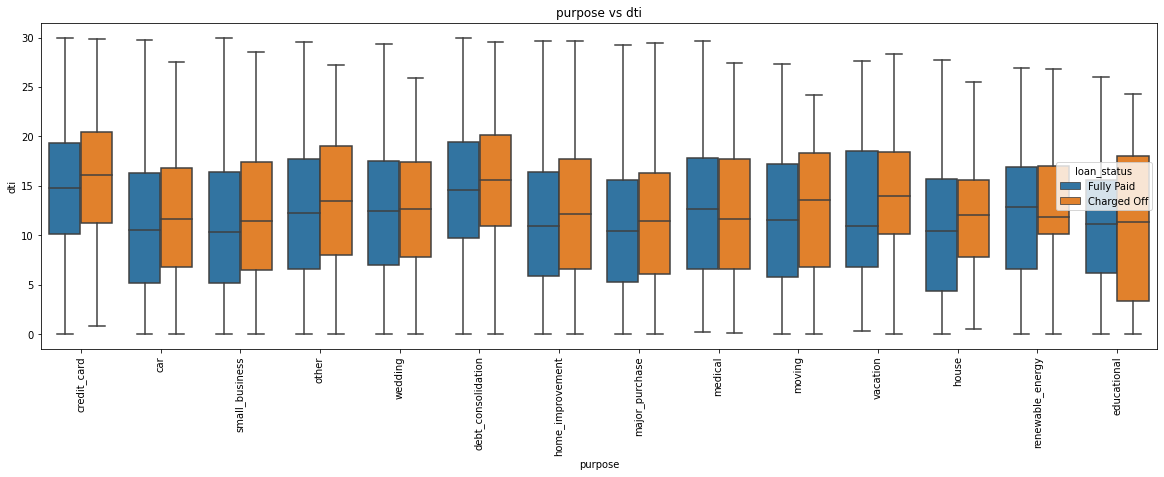

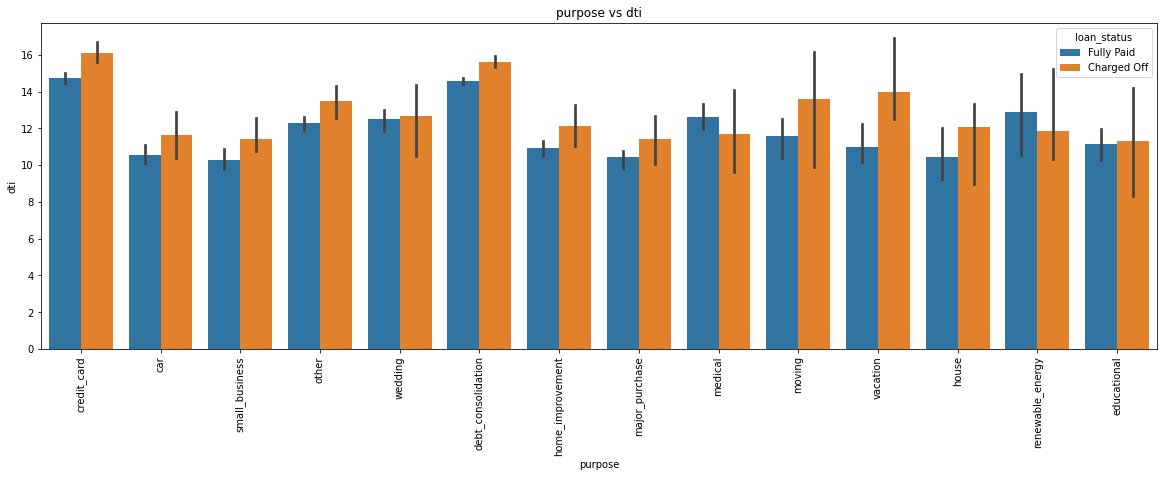

In [1583]:
catergorical_plots(var1="purpose",var2="dti",var3="loan_status",df=loan)

**observations**
   - all the purpose variables are likely to default than fully paid except renewable_energy against debt to income(monthly)
   - only renewable_energy purpose borrower able to fully pay the loan(monthly paid)by monthly against their self reported monthly income

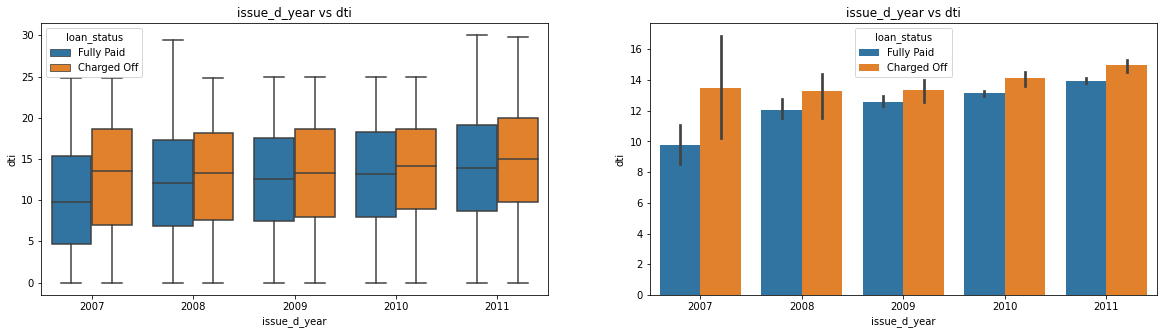

In [1593]:
catergorical_plots(var1="issue_d_year",var2="dti",var3="loan_status",df=loan)

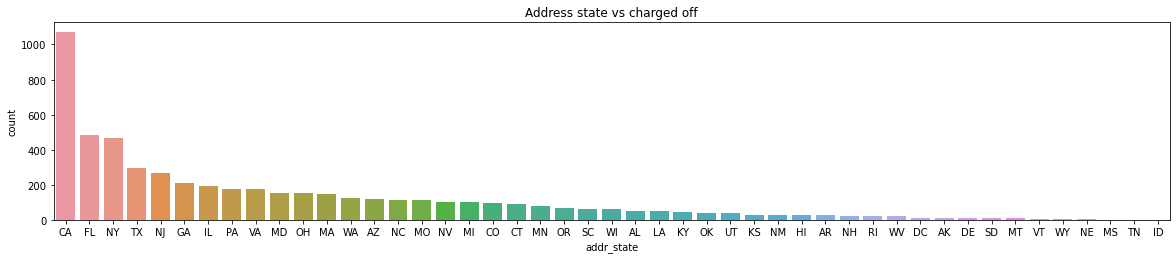

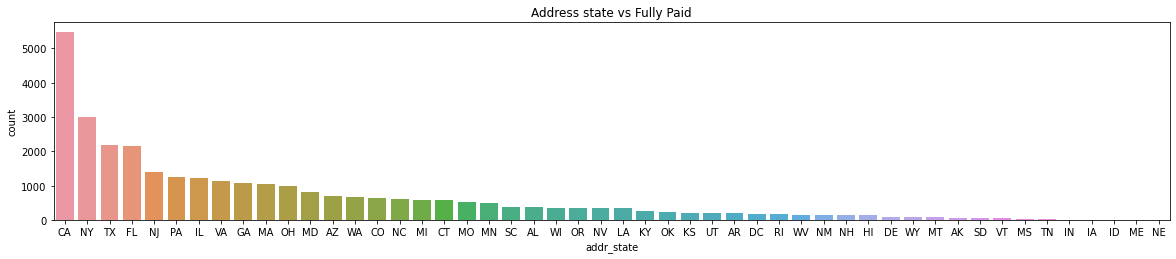

In [1584]:
#### Address state
charged_off_data = loan[loan.loan_status == 'Charged Off']
plt.figure(figsize=(20,8))
plt.subplot(211)
sns.countplot(x='addr_state',data=charged_off_data,order = charged_off_data.addr_state.value_counts().index)
plt.title('Address state vs charged off')

Fully_Paid_data = loan[loan.loan_status == 'Fully Paid']
plt.figure(figsize=(20,8))
plt.subplot(212)
sns.countplot(x='addr_state',data=Fully_Paid_data,order = Fully_Paid_data.addr_state.value_counts().index)
plt.title('Address state vs Fully Paid')
plt.show()

**observations**:
- More number of borrowers defaulted in CA,FL and NY states

### heat Map

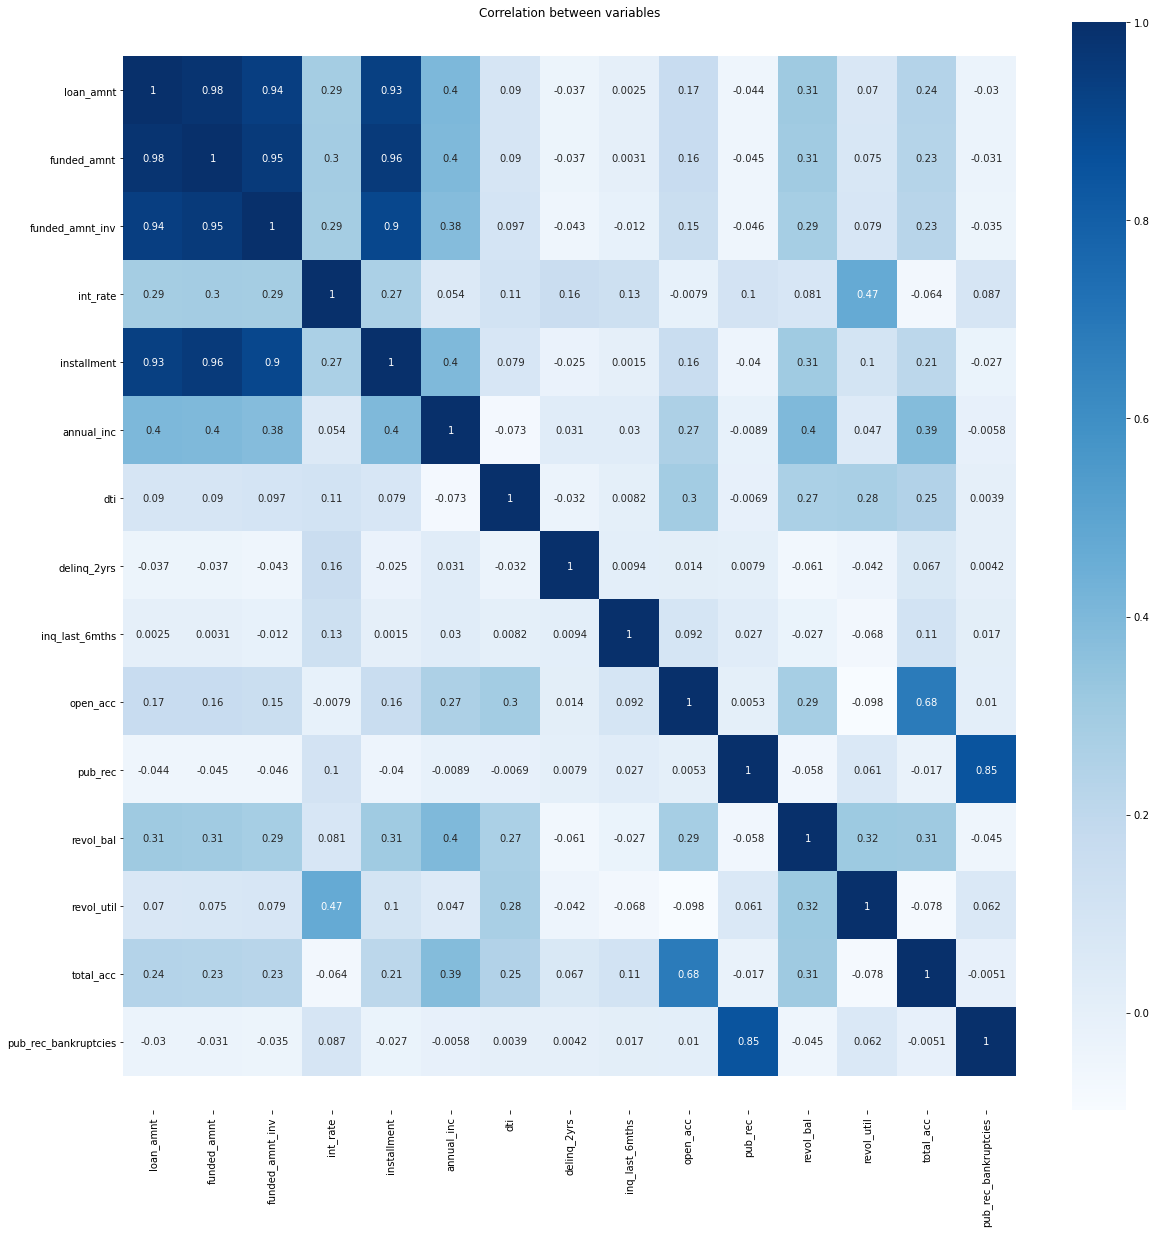

In [1585]:
#### create a heat map to find out the relationship between variables
corr_matrix = loan.iloc[:,1:].corr()
plt.figure(figsize=(20,20))
ax = sns.heatmap(corr_matrix,annot = True,cmap = 'Blues')
top,bottom = ax.get_ylim()
ax.set_ylim(top+0.5,bottom-0.5)
plt.title("Correlation between variables")
plt.show()

**observations**:
    Lets consider only loan_amount,funded_amnt,funded_amnt_inv,installment,
    total_pymnt,total_pymnt_inv,public_rec,public_rec_bankruptcies,total_acc,open_acc variables
    
  - loan_amount and funded_amnt are highly correlated with 0.98
  - loan_amount and funded_amnt_inv highly correlated with 0.95
  - loan_amount correlated with installment,total_pyment and total_pyment_inv
  
    

- funded_amnt,loan_amount,funded_amnt_inv,total_pyment_inv,installment and total_pyment are highly correlated with each other.
- open_acc and total_acc are correlated with each other.
- pub_rec and public_rec_bankruptcies are highly correlated with each other
- other variables are less correlated or not correlated with each other



## Recommendations

- Lending Club should redue high interest rates for 60 month tenures,they are prone to default
- Lending Club should not only provide a loan to Borrowers who has only good annual income,also to be provided 
who has less annual_income to make a business/Profit.irrespective of annual income borrowers higher rates of Full paid than Charged-off.
- Grades are good metric for detecting defaulters.Lending Club should collect/examine more information from Borrowers before issuing a loan to Grades(G to A).Provide a Loan to the Borrowers who falls under Category G they are highest at full paid the loan and reducing the interest rate for them will be a company profit.
- Small business and debt consolidation are defaulted more.Lending Club should reduce issuing the loans to them and reducing interest rate for house purpose will be a profit as they defaulted loan more.
- Lending Club should control their number of loan issues to borrowers who are from CA,FL and NY states to make profits.
- Borrowers with mortgage home ownership are taking higher loans and defaulting the loans.Lending Club should stop giving a loans to this category when requested loan amount is higher than 12000.
- Lendig Club should concentrate on income source of Borrowers because verified borrowers also defaulting a loan.
- Borrowers with more numbers of public derogatory records are having more chance of filing a bankruptacy.Lending Club make there are no public derogatory records for the borrower
- Lending club should reduce providing loan amount to Borrowers with highest professional experience has they are at highest defaulted the loan.
